# Project 4 

## Problem Statement

## Executive Summary

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import pyreadr
import myfunctions as f
import io

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\anpej\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Data Import

In [2]:
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')
df_spray = pd.read_csv('../datasets/spray.csv')
df_weather = pd.read_csv('../datasets/weather.csv')

## Data Cleaning

### General Cleaning for all dataframes

In [3]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [4]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [5]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [6]:
# Apply lower() to column names for all 3 dataframes
df_weather.columns = df_weather.columns.str.lower()
df_train.columns = df_train.columns.str.lower()
df_spray.columns = df_spray.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

In [7]:
# Check datatypes
print('Train dataset')
print(df_train.dtypes)
print()
print('Weather dataset')
print(df_weather.dtypes)
print()
print('Spray dataset')
print(df_spray.dtypes)
print()

Train dataset
date                       object
address                    object
species                    object
block                       int64
street                     object
trap                       object
addressnumberandstreet     object
latitude                  float64
longitude                 float64
addressaccuracy             int64
nummosquitos                int64
wnvpresent                  int64
dtype: object

Weather dataset
station          int64
date            object
tmax             int64
tmin             int64
tavg            object
depart          object
dewpoint         int64
wetbulb         object
heat            object
cool            object
sunrise         object
sunset          object
codesum         object
depth           object
water1          object
snowfall        object
preciptotal     object
stnpressure     object
sealevel        object
resultspeed    float64
resultdir        int64
avgspeed        object
dtype: object

Spray dataset
date        

In [8]:
# Change Date datatype to datetime
df_train['date'] = pd.to_datetime(df_train['date'])
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_spray['date'] = pd.to_datetime(df_spray['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

In [9]:
# Check datatypes
print('Train dataset')
print(df_train.dtypes)
print()
print('Weather dataset')
print(df_weather.dtypes)
print()
print('Spray dataset')
print(df_spray.dtypes)
print()

Train dataset
date                      datetime64[ns]
address                           object
species                           object
block                              int64
street                            object
trap                              object
addressnumberandstreet            object
latitude                         float64
longitude                        float64
addressaccuracy                    int64
nummosquitos                       int64
wnvpresent                         int64
dtype: object

Weather dataset
station                 int64
date           datetime64[ns]
tmax                    int64
tmin                    int64
tavg                   object
depart                 object
dewpoint                int64
wetbulb                object
heat                   object
cool                   object
sunrise                object
sunset                 object
codesum                object
depth                  object
water1                 object
snowfall     

In [10]:
# Create `day`, `month` and `year` columns for all 3 dataframes
df_spray['day'] = df_spray['date'].map(lambda x: x.day)
df_spray['month'] = df_spray['date'].map(lambda x: x.month)
df_spray['year'] = df_spray['date'].map(lambda x: x.year)

df_weather['day'] = df_weather['date'].map(lambda x: x.day)
df_weather['month'] = df_weather['date'].map(lambda x: x.month)
df_weather['year'] = df_weather['date'].map(lambda x: x.year)

df_train['day'] = df_train['date'].map(lambda x: x.day)
df_train['month'] = df_train['date'].map(lambda x: x.month)
df_train['year'] = df_train['date'].map(lambda x: x.year)

df_test['day'] = df_test['date'].map(lambda x: x.day)
df_test['month'] = df_test['date'].map(lambda x: x.month)
df_test['year'] = df_test['date'].map(lambda x: x.year)

In [11]:
# View data shapes
print(f'Train dataset: {df_train.shape}')
print(f'Weather dataset: {df_weather.shape}')
print(f'Spray dataset: {df_spray.shape}')

Train dataset: (10506, 15)
Weather dataset: (2944, 25)
Spray dataset: (14835, 7)


In [12]:
# Check for NA values
print(f'Train dataset: {df_train.isnull().sum().sum()}')
print(f'Weather dataset: {df_weather.isnull().sum().sum()}')
print(f'Spray dataset: {df_spray.isnull().sum().sum()}')
print(f'Test dataset: {df_test.isnull().sum().sum()}')

Train dataset: 0
Weather dataset: 0
Spray dataset: 584


### Data cleaning for df_spray

In [13]:
# Closer look at Spray dataset
print(df_spray.isnull().sum())

date           0
time         584
latitude       0
longitude      0
day            0
month          0
year           0
dtype: int64


**Comment**

Column 'Time' has 584 empty cells but it is not important for our analysis.
The null values does not appear at random. Therefore, we will drop the column

In [14]:
df_spray.drop(columns='time',inplace=True)

In [15]:
df_spray.head()

,date,latitude,longitude,day,month,year
0,2011-08-29,42.391623,-88.089163,29,8,2011
1,2011-08-29,42.391348,-88.089163,29,8,2011
2,2011-08-29,42.391022,-88.089157,29,8,2011
3,2011-08-29,42.390637,-88.089158,29,8,2011
4,2011-08-29,42.390410,-88.088858,29,8,2011


### Data cleaning for df_weather

In [16]:
# Define function to replace entires with M, blank spaces and '-' with Nan values, while T was replace with 0.05
# https://wgntv.com/weather/what-are-traces-of-precipitation/
def update_cols(df):
    df.replace(['M','-',' ', '  T'],
               [np.nan, np.nan, np.nan, 0.05],
               inplace = True)
    
update_cols(df_weather)

In [17]:
df_weather.head()
# Depart
# Departure from normal. The difference between column 4 and the 30 year normal temperature 
# for this date. A minus (-) is number of degrees below normal.
# A zero (0) indicates that the average for that day was the Normal.

# DewPoint
# The dew point is the temperature the air needs to be cooled to (at constant pressure) 
# in order to achieve a relative humidity (RH) of 100%.

# WetBulb
# At 100% relative humidity, the wet-bulb temperature is equal to the air temperature 
# (dry-bulb temperature) and it is lower at lower humidity.

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,day,month,year
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,0.0,0.00,29.10,29.82,1.7,27,9.2,1,5,2007
1,2,2007-05-01,84,52,68,NaN,51,57,0,3,...,NaN,0.00,29.18,29.82,2.7,25,9.6,1,5,2007
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,0.0,0.00,29.38,30.09,13.0,4,13.4,2,5,2007
3,2,2007-05-02,60,43,52,NaN,42,47,13,0,...,NaN,0.00,29.44,30.08,13.3,2,13.4,2,5,2007
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,0.0,0.00,29.39,30.12,11.7,7,11.9,3,5,2007


In [18]:
# Check for null
df_weather.isnull().sum().sort_values(ascending=False)

water1         2944
codesum        1609
depart         1472
sunrise        1472
sunset         1472
depth          1472
snowfall       1472
tavg             11
cool             11
heat             11
sealevel          9
stnpressure       4
wetbulb           4
avgspeed          3
preciptotal       2
tmin              0
tmax              0
date              0
year              0
dewpoint          0
month             0
resultspeed       0
resultdir         0
day               0
station           0
dtype: int64

In [19]:
# Drop water1 column as it is missing all the data
df_weather.drop(['water1'], axis = 1, inplace= True)

# Replace Nan values in codesum column with 'MODERATE'
df_weather['codesum'] = df_weather['codesum'].replace(np.nan, 'MODERATE')

In [20]:
df_weather.dtypes

station                 int64
date           datetime64[ns]
tmax                    int64
tmin                    int64
tavg                   object
depart                 object
dewpoint                int64
wetbulb                object
heat                   object
cool                   object
sunrise                object
sunset                 object
codesum                object
depth                  object
snowfall               object
preciptotal            object
stnpressure            object
sealevel               object
resultspeed           float64
resultdir               int64
avgspeed               object
day                     int64
month                   int64
year                    int64
dtype: object

In [21]:
col_toflt = ['preciptotal', 'stnpressure', 'sealevel',
             'avgspeed', 'preciptotal', 'tavg',
             'depart', 'wetbulb', 'heat', 'cool',
             'sunrise', 'sunset']

for col in col_toflt:
    df_weather[col] = df_weather[col].astype(float)

In [22]:
df_weather.dtypes

station                 int64
date           datetime64[ns]
tmax                    int64
tmin                    int64
tavg                  float64
depart                float64
dewpoint                int64
wetbulb               float64
heat                  float64
cool                  float64
sunrise               float64
sunset                float64
codesum                object
depth                  object
snowfall               object
preciptotal           float64
stnpressure           float64
sealevel              float64
resultspeed           float64
resultdir               int64
avgspeed              float64
day                     int64
month                   int64
year                    int64
dtype: object

In [23]:
# Define function to convert temperature to Celsius
def fahrenheit_to_celsius(df,column_names):
    '''
    Convert temperature from Fahrenheit to Celsius
    
    Takes:
    df - DataFrame
    column_names - (list of str) - names of columns for conversion
    
    Returns:
    df
    '''
    for name in column_names:
        try:
            df[name] = round((df[name]-32)*5/9,2)
        except TypeError:
            continue
    return df

fahrenheit_to_celsius(df_weather,
                      ['tmax','tmin','tavg','depart','dewpoint','wetbulb'])

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,day,month,year
0,1,2007-05-01,28.33,10.00,19.44,-10.00,10.56,13.33,0.0,2.0,...,0.0,0.00,29.10,29.82,1.7,27,9.2,1,5,2007
1,2,2007-05-01,28.89,11.11,20.00,NaN,10.56,13.89,0.0,3.0,...,NaN,0.00,29.18,29.82,2.7,25,9.6,1,5,2007
2,1,2007-05-02,15.00,5.56,10.56,-19.44,5.56,8.33,14.0,0.0,...,0.0,0.00,29.38,30.09,13.0,4,13.4,2,5,2007
3,2,2007-05-02,15.56,6.11,11.11,NaN,5.56,8.33,13.0,0.0,...,NaN,0.00,29.44,30.08,13.3,2,13.4,2,5,2007
4,1,2007-05-03,18.89,7.78,13.33,-16.67,4.44,8.89,9.0,0.0,...,0.0,0.00,29.39,30.12,11.7,7,11.9,3,5,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,9.44,4.44,7.22,NaN,1.11,5.56,20.0,0.0,...,NaN,0.00,29.42,30.07,8.5,29,9.0,29,10,2014
2940,1,2014-10-30,10.56,0.00,5.56,-20.00,1.11,4.44,23.0,0.0,...,0.0,0.00,29.34,30.09,5.1,24,5.5,30,10,2014
2941,2,2014-10-30,11.67,2.78,7.22,NaN,1.67,5.56,20.0,0.0,...,NaN,0.05,29.41,30.10,5.9,23,6.5,30,10,2014
2942,1,2014-10-31,8.33,0.56,4.44,-21.11,-3.89,0.56,25.0,0.0,...,0.1,0.03,29.49,30.20,22.6,34,22.9,31,10,2014


## Exploratory Data Analysis and Feature Engineering

### EDA - Weather dataset

In [24]:
# Masking weather data by station
df_weather_st1 = df_weather[df_weather['station']==1]
df_weather_st2 = df_weather[df_weather['station']==2]
# Resetting indices
df_weather_st1.reset_index(inplace=True,drop=True)
df_weather_st2.reset_index(inplace=True,drop=True)

In [25]:
# Checking for missing values from station 1
df_weather_st1.isnull().sum()

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        3
heat           0
cool           0
sunrise        0
sunset         0
codesum        0
depth          0
snowfall       0
preciptotal    0
stnpressure    2
sealevel       5
resultspeed    0
resultdir      0
avgspeed       0
day            0
month          0
year           0
dtype: int64

In [26]:
# Checking for missing values from station 2
df_weather_st2.isnull().sum()
# There are much more missing values in station 2

station           0
date              0
tmax              0
tmin              0
tavg             11
depart         1472
dewpoint          0
wetbulb           1
heat             11
cool             11
sunrise        1472
sunset         1472
codesum           0
depth          1472
snowfall       1472
preciptotal       2
stnpressure       2
sealevel          4
resultspeed       0
resultdir         0
avgspeed          3
day               0
month             0
year              0
dtype: int64

In [27]:
# Merging two station in one df
weather_two_stations = pd.merge(df_weather_st1,df_weather_st2,on='date')

In [28]:
# Creation a function for scatter- and box-plots
def scatter(column_list,df=weather_two_stations):
    '''
    Plot station 1 against station 2
    '''
    nrows = int(np.ceil(len(column_list)/2))
    fig,ax=plt.subplots(nrows=nrows,ncols=2,figsize=(20,50))
    for i,name in enumerate(column_list):
        x = df[name + '_x']
        y = df[name +'_y']
        if i <=nrows-1:
            c=0
            a = i
        else:
            c=1
            a = i - nrows

        try:
            ax[a,c].scatter(x,y)
            ax[a,c].set_title(name,fontsize=15)
            ax[a,c].set_xlabel('Station 1')
            ax[a,c].set_xlabel('Station 2')
            plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
        except:
            pass

In [29]:
# Choosing columns for scatterplots
column_names = [name.split('_')[0] for name in ['station_x', 'tmax_x', 'tmin_x', 
                                                'tavg_x', 'depart_x',
       'dewpoint_x', 'wetbulb_x', 'heat_x', 'cool_x', 'sunrise_x', 'sunset_x',
       'codesum_x', 'depth_x', 'snowfall_x', 'preciptotal_x', 'stnpressure_x',
       'sealevel_x', 'resultspeed_x', 'resultdir_x', 'avgspeed_x', 'day_x',
       'month_x', 'year_x', 'station_y', 'tmax_y', 'tmin_y', 'tavg_y',
       'depart_y', 'dewpoint_y', 'wetbulb_y', 'heat_y', 'cool_y', 'sunrise_y',
       'sunset_y', 'codesum_y', 'depth_y', 'snowfall_y', 'preciptotal_y',
       'stnpressure_y', 'sealevel_y', 'resultspeed_y', 'resultdir_y',
       'avgspeed_y', 'day_y', 'month_y', 'year_y']]
# Leave only unique names of columns
column_names = list(set(column_names))

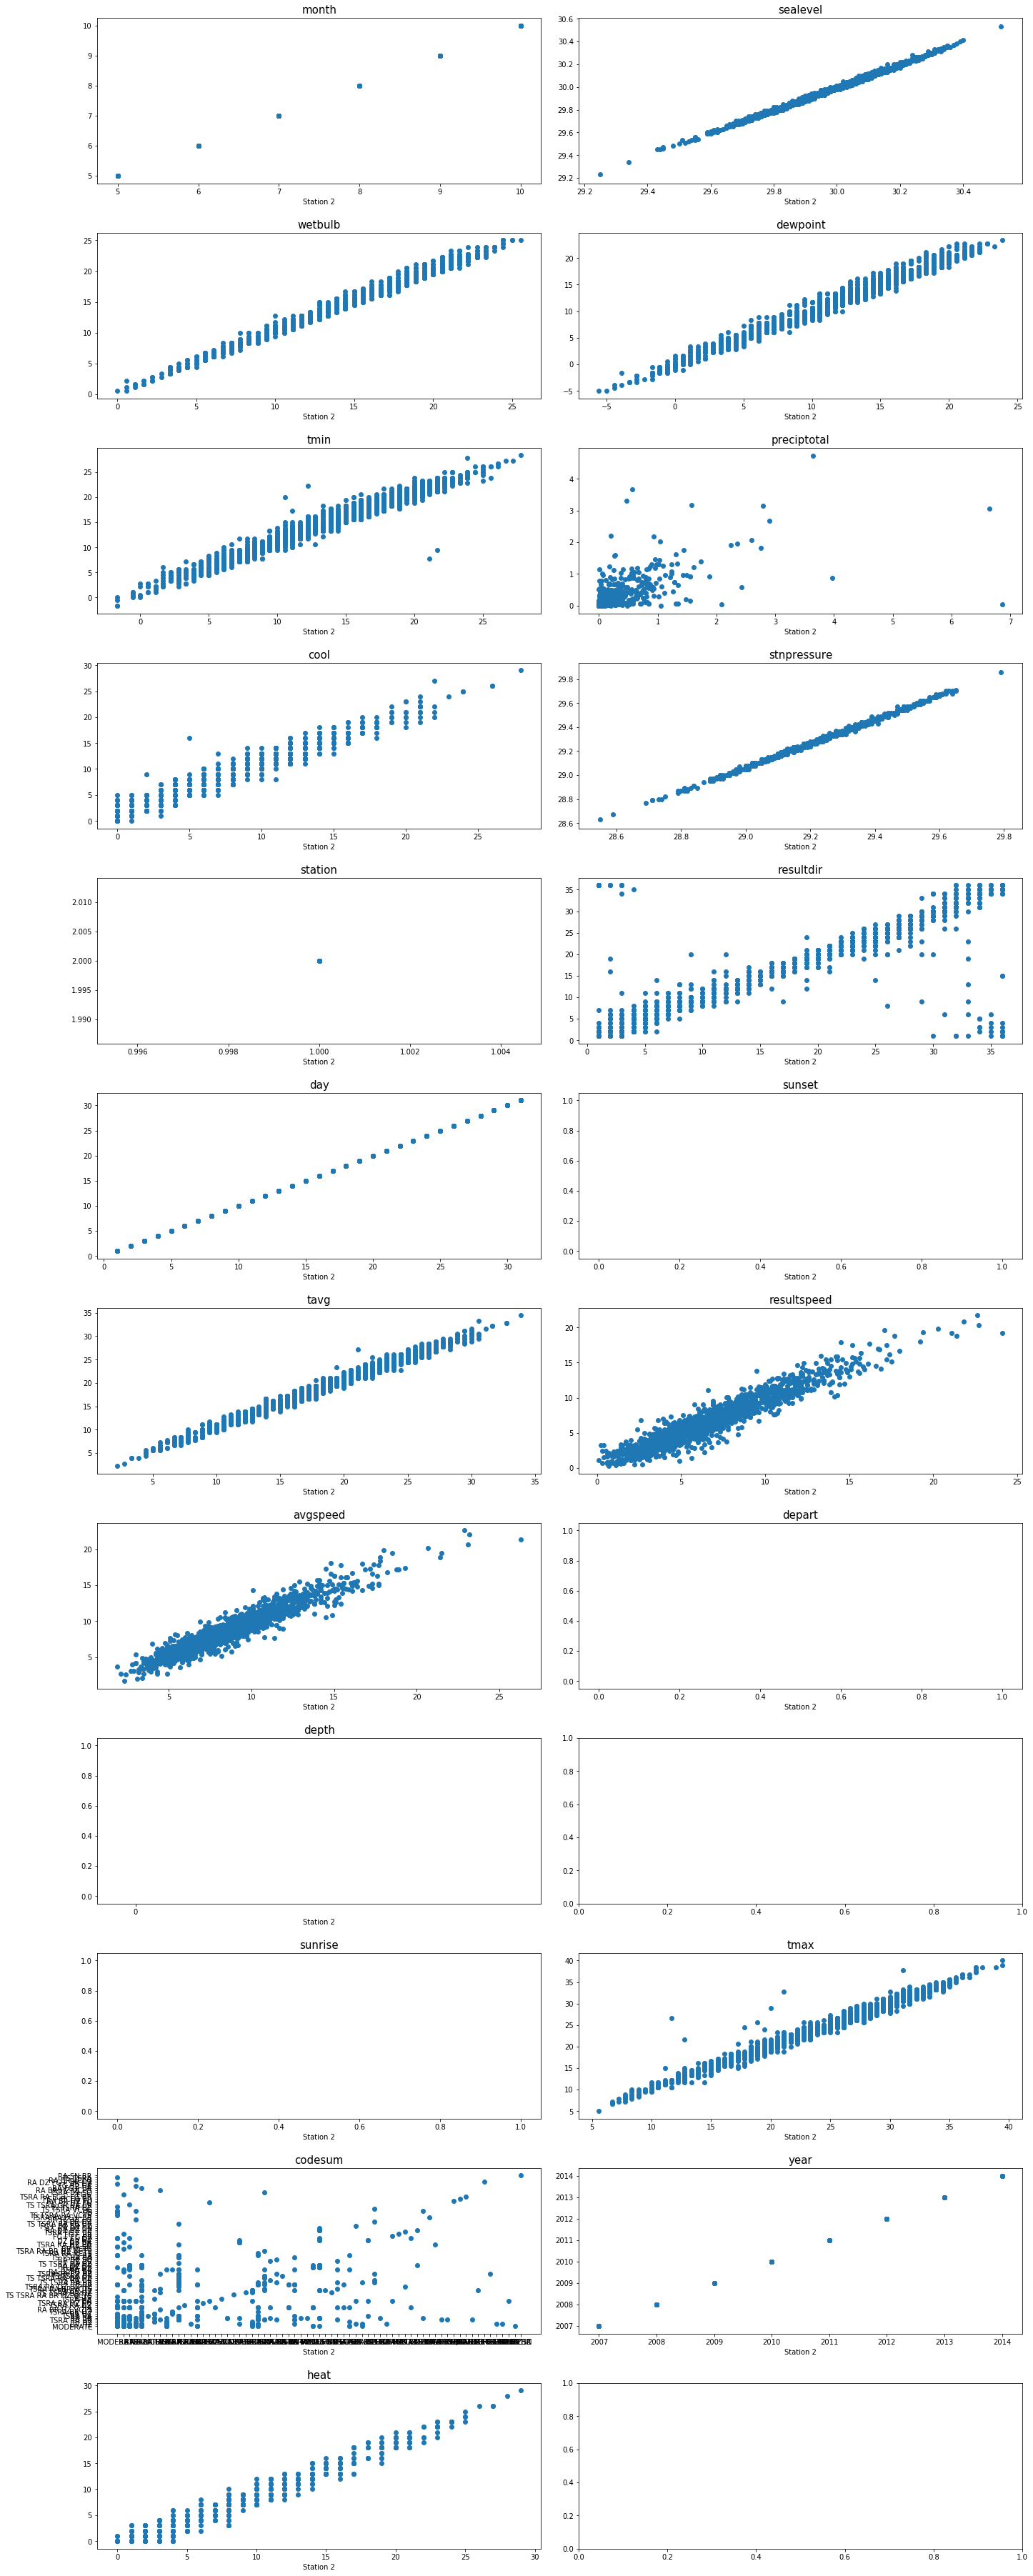

In [30]:
scatter(column_names)

**Comment**


As graphs above have shown, weather data from station 1 and station 2 is very similar.
But station 1 has much less missing values. The decision is to fill NA in station 1 with info from station 2 and drop station 2 columns.

In [31]:
index_st1=df_weather_st1[df_weather_st1.isnull().any(axis=1)].index
df_weather_st1[df_weather_st1.isnull().any(axis=1)]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,day,month,year
416,1,2009-06-18,26.67,16.11,21.67,-17.22,17.22,19.44,0.0,6.0,...,0.0,0.12,29.08,NaN,6.7,16,7.9,18,6,2009
424,1,2009-06-26,30.00,20.56,25.56,-13.89,15.56,NaN,0.0,13.0,...,0.0,0.00,NaN,29.85,6.4,4,8.2,26,6,2009
497,1,2009-09-07,25.00,15.00,20.00,-17.22,15.00,16.67,0.0,3.0,...,0.0,0.00,29.39,NaN,5.8,3,4.0,7,9,2009
866,1,2011-09-08,23.89,13.89,18.89,-17.78,11.67,15.00,0.0,1.0,...,0.0,0.05,29.34,NaN,13.0,2,13.4,8,9,2011
878,1,2011-09-20,23.33,9.44,16.67,-17.78,12.22,14.44,3.0,0.0,...,0.0,0.00,29.26,NaN,7.3,18,7.3,20,9,2011
1045,1,2012-09-03,31.11,21.67,26.67,-11.11,21.11,22.78,0.0,15.0,...,0.0,0.00,29.17,NaN,4.6,6,4.4,3,9,2012
1205,1,2013-08-10,27.22,17.78,22.78,-17.78,13.89,NaN,0.0,8.0,...,0.0,0.00,NaN,30.08,5.3,5,6.5,10,8,2013
1206,1,2013-08-11,27.22,15.56,21.67,-18.89,16.11,NaN,0.0,6.0,...,0.0,0.01,29.35,30.07,2.0,27,3.0,11,8,2013


In [32]:
df_weather_st2.loc[index_st1,:]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,day,month,year
416,2,2009-06-18,27.22,17.22,22.22,NaN,17.78,19.44,0.0,7.0,...,NaN,0.11,29.15,29.79,3.7,17,5.8,18,6,2009
424,2,2009-06-26,30.00,22.22,26.11,NaN,16.11,19.44,0.0,14.0,...,NaN,0.00,29.20,29.83,6.4,4,8.0,26,6,2009
497,2,2009-09-07,25.00,17.22,21.11,NaN,15.00,17.22,0.0,5.0,...,NaN,0.00,29.44,30.09,6.3,4,6.9,7,9,2009
866,2,2011-09-08,23.33,16.67,20.00,NaN,12.22,15.00,0.0,3.0,...,NaN,0.06,29.36,30.03,14.9,2,15.2,8,9,2011
878,2,2011-09-20,23.89,11.67,17.78,NaN,12.22,14.44,1.0,0.0,...,NaN,0.01,29.33,29.99,5.8,17,6.1,20,9,2011
1045,2,2012-09-03,30.56,22.78,26.67,NaN,20.56,22.78,0.0,15.0,...,NaN,0.00,29.23,29.87,5.0,7,5.9,3,9,2012
1205,2,2013-08-10,27.22,20.00,23.89,NaN,12.78,17.22,0.0,10.0,...,NaN,0.00,NaN,30.07,6.0,6,7.4,10,8,2013
1206,2,2013-08-11,28.89,17.22,23.33,NaN,13.89,17.78,0.0,9.0,...,NaN,0.05,29.42,30.06,4.0,24,5.4,11,8,2013


In [33]:
# Filling NA in station 1 with info from station 2
df_weather_st1.loc[:,'wetbulb'].fillna(df_weather_st2['wetbulb'],inplace=True)
df_weather_st1.loc[:,'stnpressure'].fillna(df_weather_st2['stnpressure'],inplace=True)
df_weather_st1.loc[:,'sealevel'].fillna(df_weather_st2['sealevel'],inplace=True)
# row with index 1205 don't have value in both stations. 
# It will be filled with info from the next day
df_weather_st1.loc[:,'stnpressure'].fillna(29.42,inplace=True);

C:\Users\anpej\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
df_weather_st1.isnull().sum()
# now we don't have missing values in weather df

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
codesum        0
depth          0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
day            0
month          0
year           0
dtype: int64

In [35]:
numeric_df = df_weather_st1._get_numeric_data()

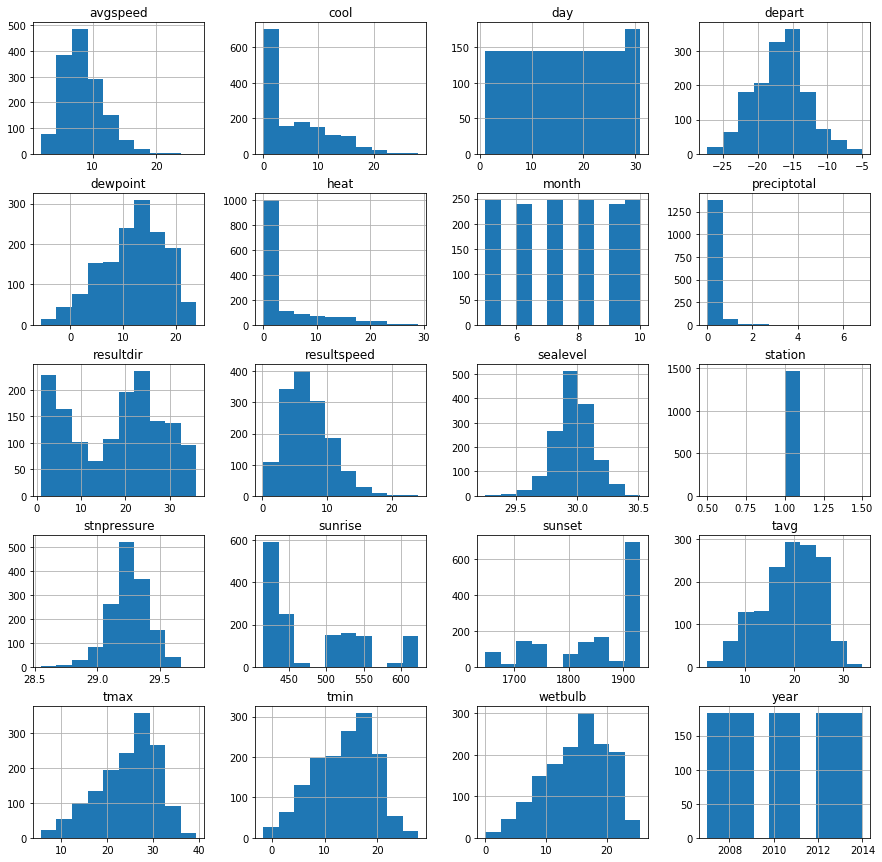

In [36]:
numeric_df.hist(figsize=(15,15));

### EDA - Spray dataset

In [37]:
# Choosing columns for clustering
X = df_spray[['day', 'month','year','latitude', 'longitude']]

In [38]:
# Standartizing data
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
# Training DBSCAN for predicting 
dbs = DBSCAN(eps=0.1)
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [39]:
# Verifying labels (there should be 13)
np.unique(dbs.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [40]:
# Adding labels to spray df
df_spray['labels'] = dbs.labels_

In [41]:
df_spray.head()

,date,latitude,longitude,day,month,year,labels
0,2011-08-29,42.391623,-88.089163,29,8,2011,0
1,2011-08-29,42.391348,-88.089163,29,8,2011,0
2,2011-08-29,42.391022,-88.089157,29,8,2011,0
3,2011-08-29,42.390637,-88.089158,29,8,2011,0
4,2011-08-29,42.390410,-88.088858,29,8,2011,0


In [42]:
df_spray = df_spray.loc[df_spray['longitude'] > -88]

In [43]:
# Looking at result
clusteres_df = df_spray.groupby(['labels','date']).count()
clusteres_df.sort_values('date')

,,latitude,longitude,day,month,year
labels,date,,,,,
1,2011-09-07,2114,2114,2114,2114,2114
2,2013-07-17,556,556,556,556,556
3,2013-07-17,1646,1646,1646,1646,1646
4,2013-07-25,1607,1607,1607,1607,1607
5,2013-08-08,1195,1195,1195,1195,1195
6,2013-08-15,2668,2668,2668,2668,2668
7,2013-08-16,141,141,141,141,141
8,2013-08-22,845,845,845,845,845
9,2013-08-22,742,742,742,742,742


In [44]:
# Defining min and max latitudes and longitudes for each cluster
min_spray = max_spray = df_spray.groupby('labels')[['date','latitude','longitude']].min()
max_spray = max_spray = df_spray.groupby('labels')[['latitude','longitude']].max()

In [45]:
# Merging min and max df in one
min_max_spray = pd.merge(min_spray,max_spray,on='labels')
# Renaming columns to make them more understandable
min_max_spray.columns = ['date', 'latitude_min', 'longitude_min', 'latitude_max', 'longitude_max'] 

In [46]:
min_max_spray

,date,latitude_min,longitude_min,latitude_max,longitude_max
labels,,,,,
1,2011-09-07,41.968435,-87.836560,41.997028,-87.787710
2,2013-07-17,41.972617,-87.871023,42.015098,-87.762165
3,2013-07-17,41.714098,-87.672362,41.743287,-87.629355
4,2013-07-25,41.939308,-87.739840,41.968097,-87.707987
5,2013-08-08,41.917227,-87.716847,41.946703,-87.678060
6,2013-08-15,41.887825,-87.818408,41.966532,-87.745625
7,2013-08-16,41.911375,-87.785792,41.964712,-87.746675
8,2013-08-22,41.873487,-87.730655,41.895475,-87.701623
9,2013-08-22,41.713925,-87.623142,41.765277,-87.586727


### EDA - Train dataset

In [47]:
df_train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,day,month,year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007


### Merge df_train and df_weather for EDA

In [48]:
# Codes
# Create temproray dataframe by merging cleaned df_train and df_weather dataframes
df = pd.merge(df_train, df_weather_st1, on="date")

# Select a few columns for analysis
df = df[['date', 'nummosquitos', 'species', 'tavg', 'wnvpresent', 'sealevel', 'dewpoint', 'wetbulb', 'preciptotal', 'stnpressure']]

# Create another temporary variable, this is the mean temperature, mosquitos and wnv present
df_mean = df.groupby(['date']).mean()

# Segregate species that carry WNV or not
df['wnvspecies'] = [1 if ('PIPIENS' or 'RESTUANS') in row else 0 for row in df['species']]

# Segregate Non-Pipiens / Restuans (0), Pip&Rest w/o WNV (1), Pip&Rest with WNV (0)
df['3cat'] = df['wnvspecies'] + df['wnvpresent']

# Create 2 temporary dataframes to categorise data by month (average for weather, total for mosquito and virus data)
df_date = df.groupby('date')['nummosquitos','wnvpresent'].sum()
df_temp = df.groupby('date')['tavg','wetbulb'].mean()
df_date['tavg'] = df_temp['tavg']
df_date['wetbulb'] = df_temp['wetbulb']

df_date_month = df_date.groupby(by=[df_date.index.month])['nummosquitos','wnvpresent'].sum()
df_temp_month = df_date.groupby(by=[df_date.index.month])['tavg','wetbulb'].mean()
df_date_month['tavg'] = df_temp_month['tavg']
df_date_month['wetbulb'] = df_temp_month['wetbulb']

C:\Users\anpej\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\anpej\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\anpej\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\anpej\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


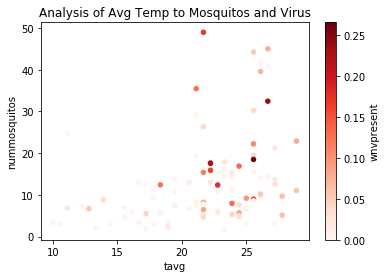

In [49]:
# Higher Temperature = More Mosquitos = Higher weightage of WNV Present

fig, ax = plt.subplots()
df_mean.plot.scatter(x='tavg', y='nummosquitos', c='wnvpresent', colormap='Reds', ax=ax)
ax.set_title('Analysis of Avg Temp to Mosquitos and Virus');

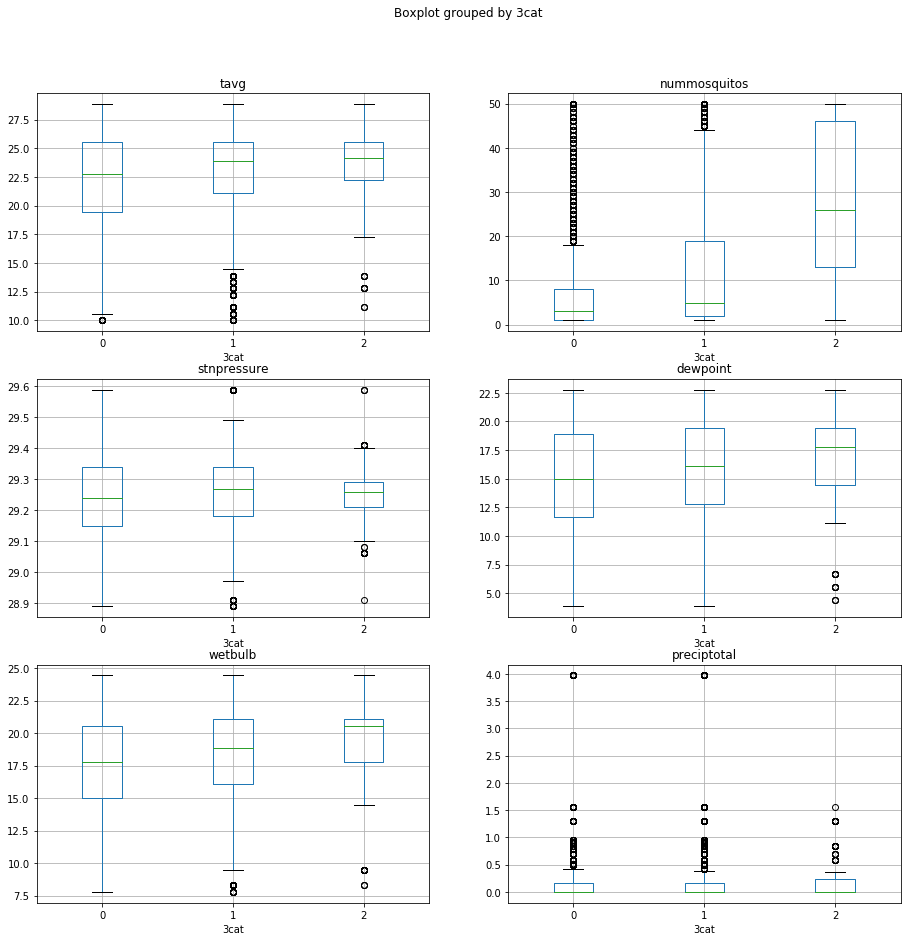

In [50]:
# Category labels:
# 0 [Non-Pipiens & Restuans (Statistically 0 WNV Present)]
# 1 [Pipiens & Restuans with NO WNV]
# 2 [Pipiens & Restuans WITH WNV]

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15)) 

df.boxplot(column='tavg', by='3cat', ax=axes[0,0]) 
df.boxplot(column='nummosquitos', by='3cat', ax=axes[0,1]) 
df.boxplot(column='stnpressure', by='3cat', ax=axes[1,0]) 
df.boxplot(column='dewpoint', by='3cat', ax=axes[1,1]) 
df.boxplot(column='wetbulb', by='3cat', ax=axes[2,0]) 
df.boxplot(column='preciptotal', by='3cat', ax=axes[2,1]) 

plt.show()

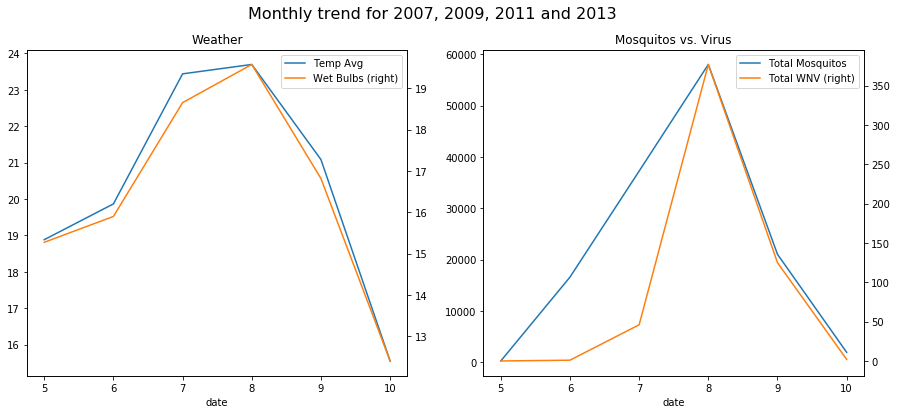

In [51]:
# Month by month analysis for training dataset

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,6))

fig.suptitle("Monthly trend for 2007, 2009, 2011 and 2013", fontsize=16)
df_date_month.tavg.plot(label="Temp Avg", legend=True, ax=axes[0])
df_date_month.wetbulb.plot(secondary_y=True, label="Wet Bulbs", legend=True, ax=axes[0])
axes[0].set_title('Weather')

df_date_month.nummosquitos.plot(label='Total Mosquitos', legend=True,  ax=axes[1]) 
df_date_month.wnvpresent.plot(label='Total WNV', legend=True, ax=axes[1], secondary_y=True)
axes[1].set_title('Mosquitos vs. Virus')

plt.show()

### Bryan Pushing his EDA Here /End

#### Merge df_train by date, followed by by trap

In [52]:
df_train_groupbydate_trap = df_train.groupby(['date','trap'])

In [53]:
def chkWNV(series):
    return 1 if series.sum() > 0 else 0

In [54]:
# Merge by Date, followed by Trap
df_train_bydate_trap = pd.DataFrame(columns=['date', 'address', 'species',
                                             'block', 'street', 'trap',
                                             'addressnumberandstreet',
                                             'latitude', 'longitude',
                                             'addressaccuracy',
                                             'nummosquitos', 'wnvpresent'])

for date_trap, df in df_train_groupbydate_trap:
    df_train_bydate_trap.loc[len(df_train_bydate_trap)] = [date_trap[0],
                                                           np.unique(df['address'])[0],
                                                           np.unique(df['species']),
                                                           np.unique(df['block'])[0],
                                                           np.unique(df['street'])[0],
                                                           date_trap[1], 
                                                           np.unique(df['addressnumberandstreet'])[0], 
                                                           np.unique(df['latitude'])[0],
                                                           np.unique(df['longitude'])[0],
                                                           np.unique(df['addressaccuracy'])[0],
                                                           sum(df['nummosquitos']),
                                                           chkWNV(df['wnvpresent'])]

In [55]:
df_train_bydate_trap.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...","[CULEX PIPIENS/RESTUANS, CULEX RESTUANS]",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,2,0
1,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",[CULEX RESTUANS],62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
2,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA","[CULEX PIPIENS/RESTUANS, CULEX RESTUANS]",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,5,0
3,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",[CULEX RESTUANS],15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
4,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",[CULEX RESTUANS],25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0


In [56]:
df_train_bydate_trap['species'] = df_train_bydate_trap['species'].apply(','.join)

In [57]:
df_train_bydate_trap['iswnvspecies'] = df_train_bydate_trap['species'].str.contains('PIPIENS|RESTUANS').astype(int)

In [58]:
df_train_bydate_trap.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,iswnvspecies
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...","CULEX PIPIENS/RESTUANS,CULEX RESTUANS",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,2,0,1
1,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1
2,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA","CULEX PIPIENS/RESTUANS,CULEX RESTUANS",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,5,0,1
3,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0,1
4,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0,1


In [59]:
len(df_train_bydate_trap['trap'].unique())

136

---

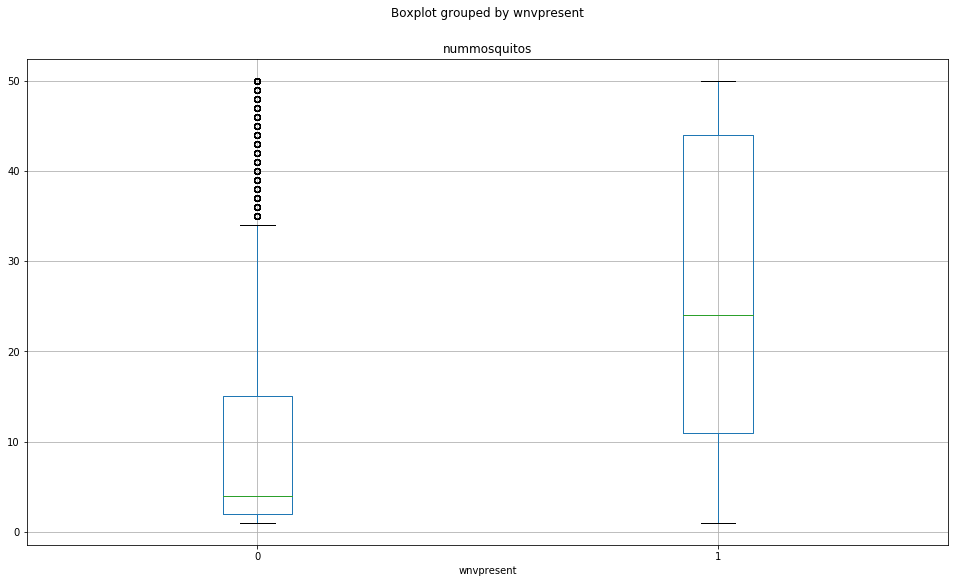

In [60]:
# Number of caught mosquitos by presence of virus
df_train.boxplot(by='wnvpresent',column='nummosquitos',figsize=(16,9));
# Virus is present if number of mosquitos is high

# These test results are organized in such a way that when the number of mosquitos exceed 50, 
# they are split into another record (another row in the dataset), 
# such that the number of mosquitos are capped at 50.

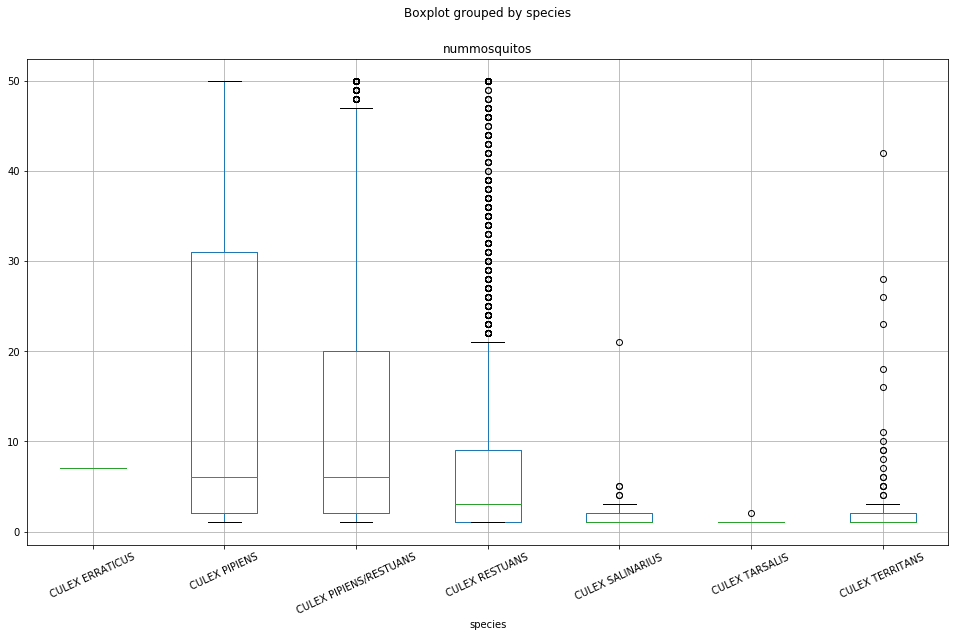

In [61]:
# Number of mosquitos by species of mosquitos
df_train.boxplot(by='species',column='nummosquitos',rot=25, figsize=(16,9));
# 2 species of mosquitos caught much frequently than others - Culex Pipiens and Culex Restuans

# Records exist only when a particular species of mosquitos is found at a certain trap 
# at a certain time. Date: date that the WNV test is performed

In [62]:
# NumMosquitos and WnvPresent by species
df_train.groupby('species')[['nummosquitos','wnvpresent']].sum()
# 2 species cought much frequantly and they contain virus - Also, Culex Pipiens and Culex Restuans
# ? does other species are rare in the area
# ? does it mean that other species can have the virus but due to their rareness we don't see it

,nummosquitos,wnvpresent
species,,
CULEX ERRATICUS,7,0
CULEX PIPIENS,44671,240
CULEX PIPIENS/RESTUANS,66268,262
CULEX RESTUANS,23431,49
CULEX SALINARIUS,145,0
CULEX TARSALIS,7,0
CULEX TERRITANS,510,0


In [63]:
df_train['trap'].value_counts()

T900     750
T115     542
T138     314
T002     185
T135     183
        ... 
T238       7
T094B      5
T076       5
T237       3
T040       2
Name: trap, Length: 136, dtype: int64

In [64]:
df_train['species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: species, dtype: int64

In [65]:
pd.pivot_table(df_train, index='species', values='wnvpresent')

,wnvpresent
species,
CULEX ERRATICUS,0.000000
CULEX PIPIENS,0.088922
CULEX PIPIENS/RESTUANS,0.055135
CULEX RESTUANS,0.017883
CULEX SALINARIUS,0.000000
CULEX TARSALIS,0.000000
CULEX TERRITANS,0.000000


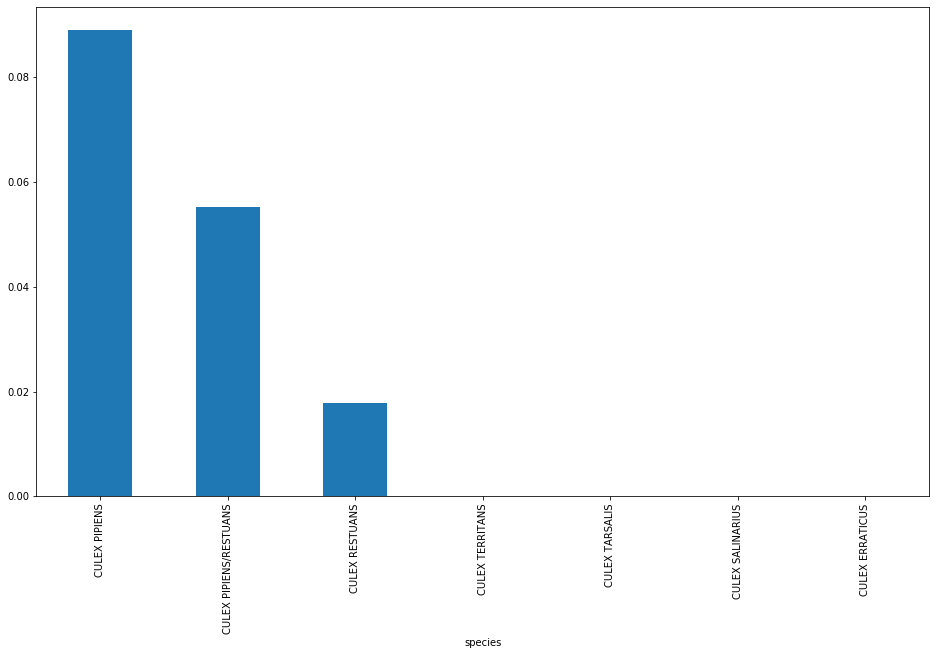

In [66]:
df_train.groupby('species')['wnvpresent'].mean().sort_values(ascending=False).plot.bar(figsize=(16,9));

**Comment**

Based on the above, only mosquitoes which are of the species Culex Pipiens, Culex Pipiens/Restuans and Culex Restuans will carry the West Nile Virus. Therefore, a new boolean feature which indicates whether the mosquitoes caught in each trap are of these few species is created.

In [67]:
df_train['iswnvspecies'] = df_train['species'].str.contains('PIPIENS|RESTUANS').astype(int)

In [68]:
# Get top 10 traps with highest occurance of West Nile Virus
top10 = df_train.groupby('trap')['wnvpresent','nummosquitos'].mean().sort_values(by='wnvpresent',ascending=False)
top10.head(10)

C:\Users\anpej\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,wnvpresent,nummosquitos
trap,,
T143,0.193548,7.419355
T006,0.166667,4.458333
T005,0.142857,3.571429
T233,0.140000,15.160000
T014,0.133333,12.133333
T096,0.120000,11.560000
T003,0.114754,11.032787
T015,0.114286,4.828571
T235,0.112903,8.983871


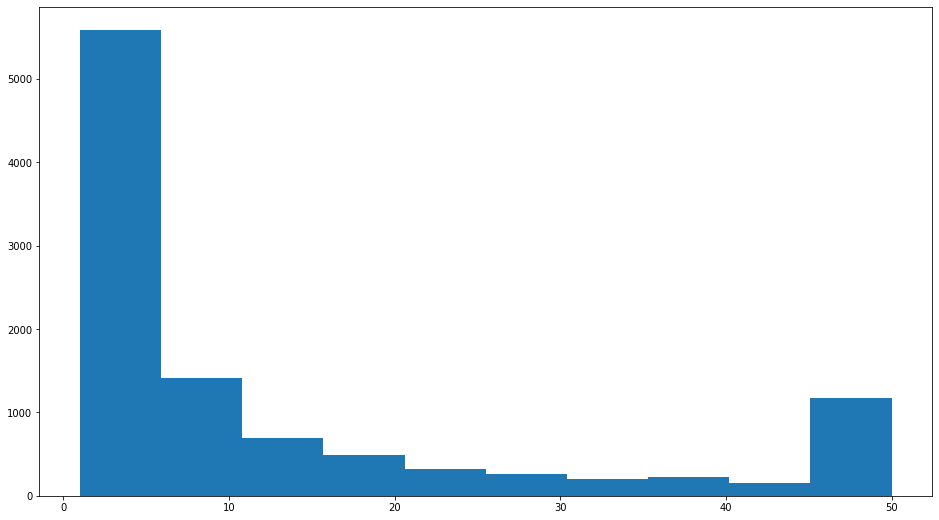

In [69]:
plt.figure(figsize=(16,9))
plt.hist(data=df_train,x='nummosquitos');

### EDA - Combined dataset

In [70]:
# Creating a new column is_spray and setting all cells as False
df_train['is_spray'] = False
df_test['is_spray'] = False

In [71]:
# Setting time delta as 30 days. The spray lasts
# A typical mosquito treatment lasts about 30 days. 
# https://www.callnorthwest.com/2019/05/how-long-does-a-mosquito-treatment-last/
tdelta_min = dt.timedelta(days=0)
tdelta_max = dt.timedelta(days=30)
for df in [df_train,df_test]
    # Looping through df with min,max latitudes and longitudes
    for i,spray in min_max_spray.iterrows():
        long_min = spray['longitude_min']
        long_max = spray['longitude_max']
        lat_min = spray['latitude_min']
        lat_max = spray['latitude_max']
    # Looping through train df, checking is latitudes and longitudes lay between min and max
    # and date is the same date or date +30 days of spraying 
        for j,row in df.iterrows():
            if (tdelta_min < (row['date']-spray['date']) <=tdelta_max):
                if ((lat_min <= row['latitude'] <= lat_max) &
                    (long_min <= row['longitude'] <= long_max)):
                    df_train.loc[j,'is_spray'] = True

In [72]:
# Checking number of rows in train which were sprayed - train
df_train['is_spray'].value_counts()
# Checking number of rows in train which were sprayed - test
df_test['is_spray'].value_counts()

False    10280
True       226
Name: is_spray, dtype: int64

In [73]:
# Merging weather and train df
main_df = pd.merge(df_train,df_weather_st1, on=['date','year','month','day'])
main_df_test = pd.merge(df_test,df_weather_st1, on=['date','year','month','day'])

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,...,sunset,codesum,depth,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,1917.0,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,1917.0,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,1917.0,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,1917.0,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,1917.0,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5


In [74]:
main_df.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
day                       0
month                     0
year                      0
iswnvspecies              0
is_spray                  0
station                   0
tmax                      0
tmin                      0
tavg                      0
depart                    0
dewpoint                  0
wetbulb                   0
heat                      0
cool                      0
sunrise                   0
sunset                    0
codesum                   0
depth                     0
snowfall                  0
preciptotal               0
stnpressure               0
sealevel                  0
resultspeed               0
resultdir           

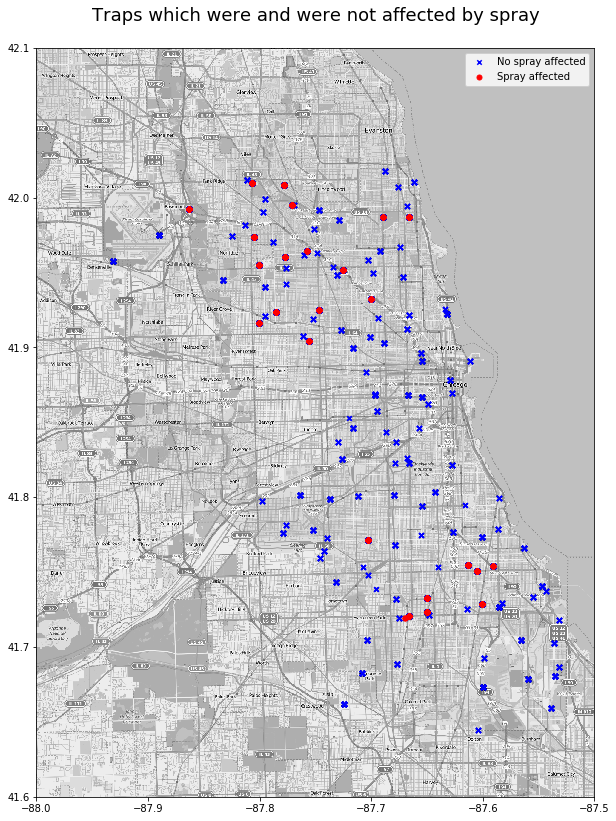

In [75]:
spray_traps = main_df[main_df['is_spray']==True]
spray_no_traps = main_df[main_df['is_spray']==False]

lats_spray = spray_traps['latitude']
longs_spray = spray_traps['longitude']
lats_no_spray = spray_no_traps['latitude']
longs_no_spray = spray_no_traps['longitude']

f.gen_map()

plt.scatter(x=longs_no_spray, y=lats_no_spray, c='b', s=20, marker='x',label='No spray affected')
plt.scatter(x=longs_spray, y=lats_spray, c='r', s=25,label='Spray affected')
plt.title('Traps which were and were not affected by spray\n',fontsize=18)
plt.legend()
plt.show();

In [76]:
main_df.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'day', 'month', 'year', 'iswnvspecies',
       'is_spray', 'station', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed'],
      dtype='object')

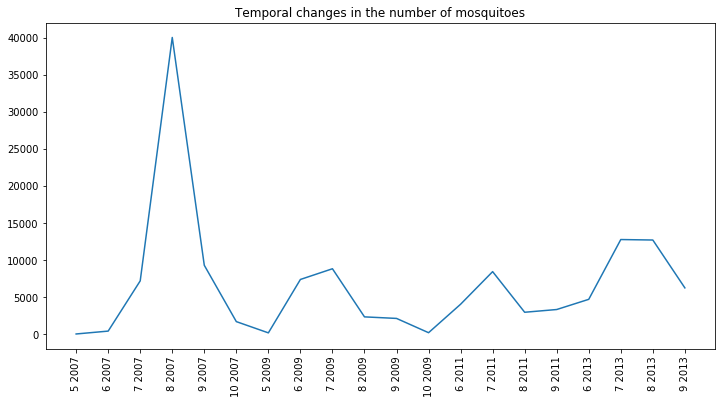

In [77]:
# Visualisation of temporal trend of number of mosquitoes 
main_df['month'] = main_df['date'].map(lambda x: x.month)
num_mosq_month = main_df.groupby(['year','month'])['nummosquitos'].sum().reset_index(level=[0,1])
plt.figure(figsize=(12,6))
plt.plot(num_mosq_month['nummosquitos'])
plt.xticks(range(len(num_mosq_month)),
labels=list(num_mosq_month['month'].astype('str')+' '+num_mosq_month['year'].astype('str')),
          rotation='vertical')
plt.title('Temporal changes in the number of mosquitoes');

**Comment**

From the linegraph it can be seen that the train dataset contain information only about 5th,6th,7th,8th,9th and 10th months of 2007,2009,2011 and 2013 years.

The biggest numbers of mosquitoes are in 7th and 8th each year.

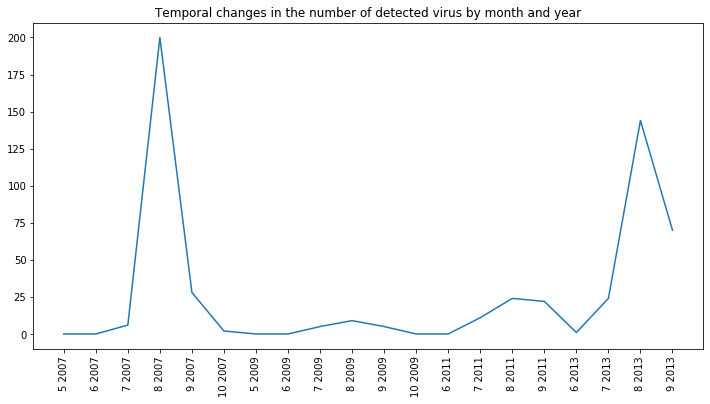

In [78]:
# Plot total count of traps with virus per month over time
num_mosq_month = main_df.groupby(['year','month'])['wnvpresent'].sum().reset_index(level=[0,1])
plt.figure(figsize=(12,6))
plt.plot(num_mosq_month['wnvpresent'])
plt.xticks(range(len(num_mosq_month)),
labels=list(num_mosq_month['month'].astype('str')+' '+num_mosq_month['year'].astype('str')),
          rotation='vertical')
plt.title('Temporal changes in the number of detected virus by month and year');

**Comment**

The linegraph illustrate that high number of virus was detected in month 8.

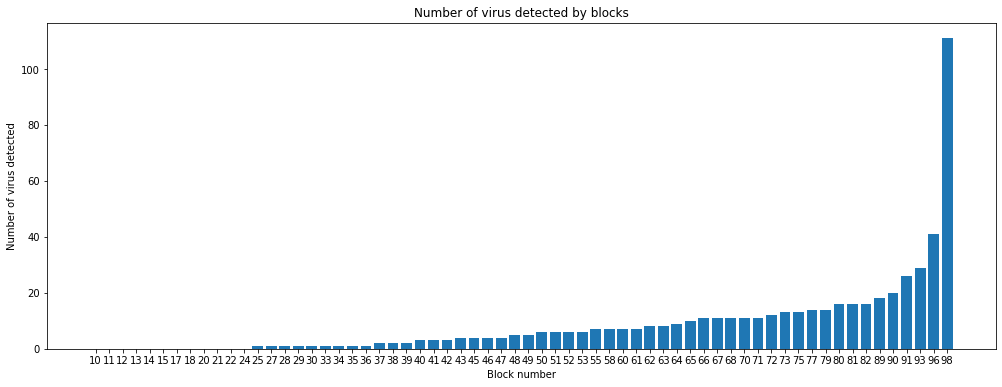

In [79]:
plt.figure(figsize=(17,6))
plt.bar(range(len(main_df['block'].unique())), main_df.groupby('block')['wnvpresent'].sum().sort_values())
plt.xlabel('Block number')
plt.ylabel('Number of virus detected')
plt.title('Number of virus detected by blocks')
plt.xticks(range(len(main_df['block'].unique())),labels=sorted(main_df['block'].unique()));

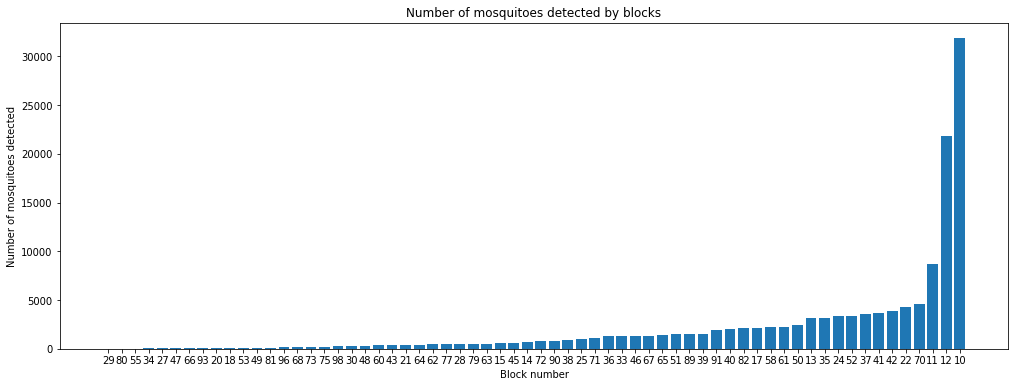

In [80]:
plt.figure(figsize=(17,6))
plt.bar(range(len(main_df['block'].unique())), main_df.groupby('block')['nummosquitos'].sum().sort_values())
plt.xlabel('Block number')
plt.ylabel('Number of mosquitoes detected')
plt.title('Number of mosquitoes detected by blocks')
plt.xticks(range(len(main_df['block'].unique())),
           labels=main_df.groupby('block')['nummosquitos'].sum().sort_values().index);

**Comment**

It can be seen that 10th amf 12th block have the anomaly high number of virus detected and number of mosquitoes.

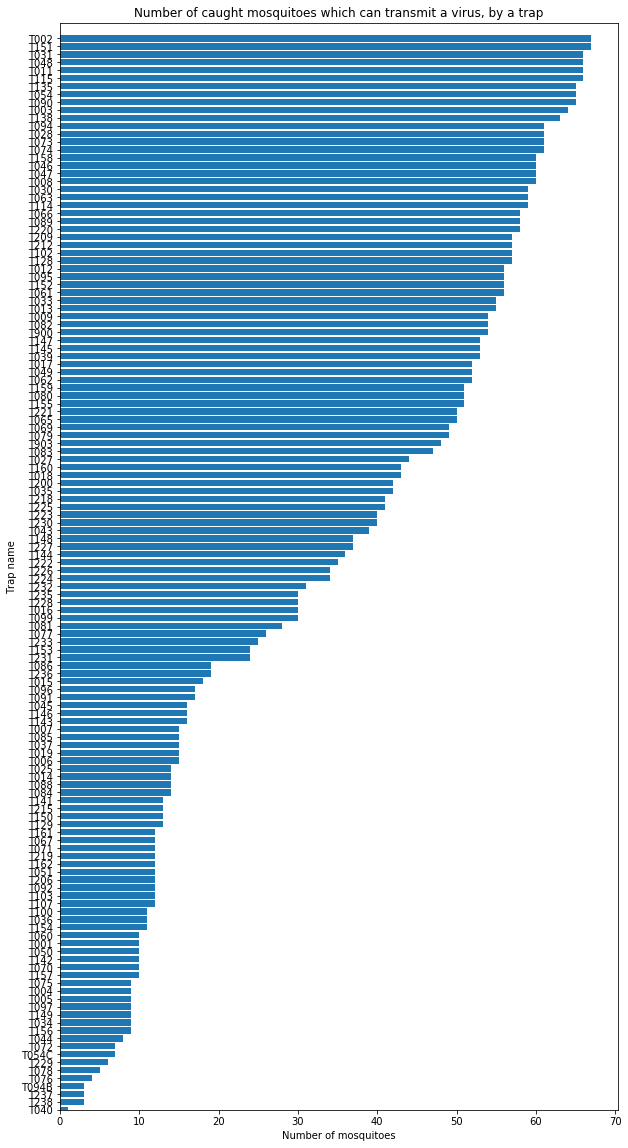

In [81]:
# number of mosq species carry a virus by traps
bin = np.arange(137)
plt.figure(figsize=(10,20))
grouped = df_train_bydate_trap.groupby('trap')['iswnvspecies'].sum()
grouped.sort_values(inplace=True)
plt.barh(grouped.index,grouped.values)
plt.yticks(range(len(grouped.index)),labels=grouped.index)
plt.ylim([0,bin.size])
plt.title('Number of caught mosquitoes which can transmit a virus, by a trap')
plt.xlabel('Number of mosquitoes')
plt.ylabel('Trap name');

**Comment**

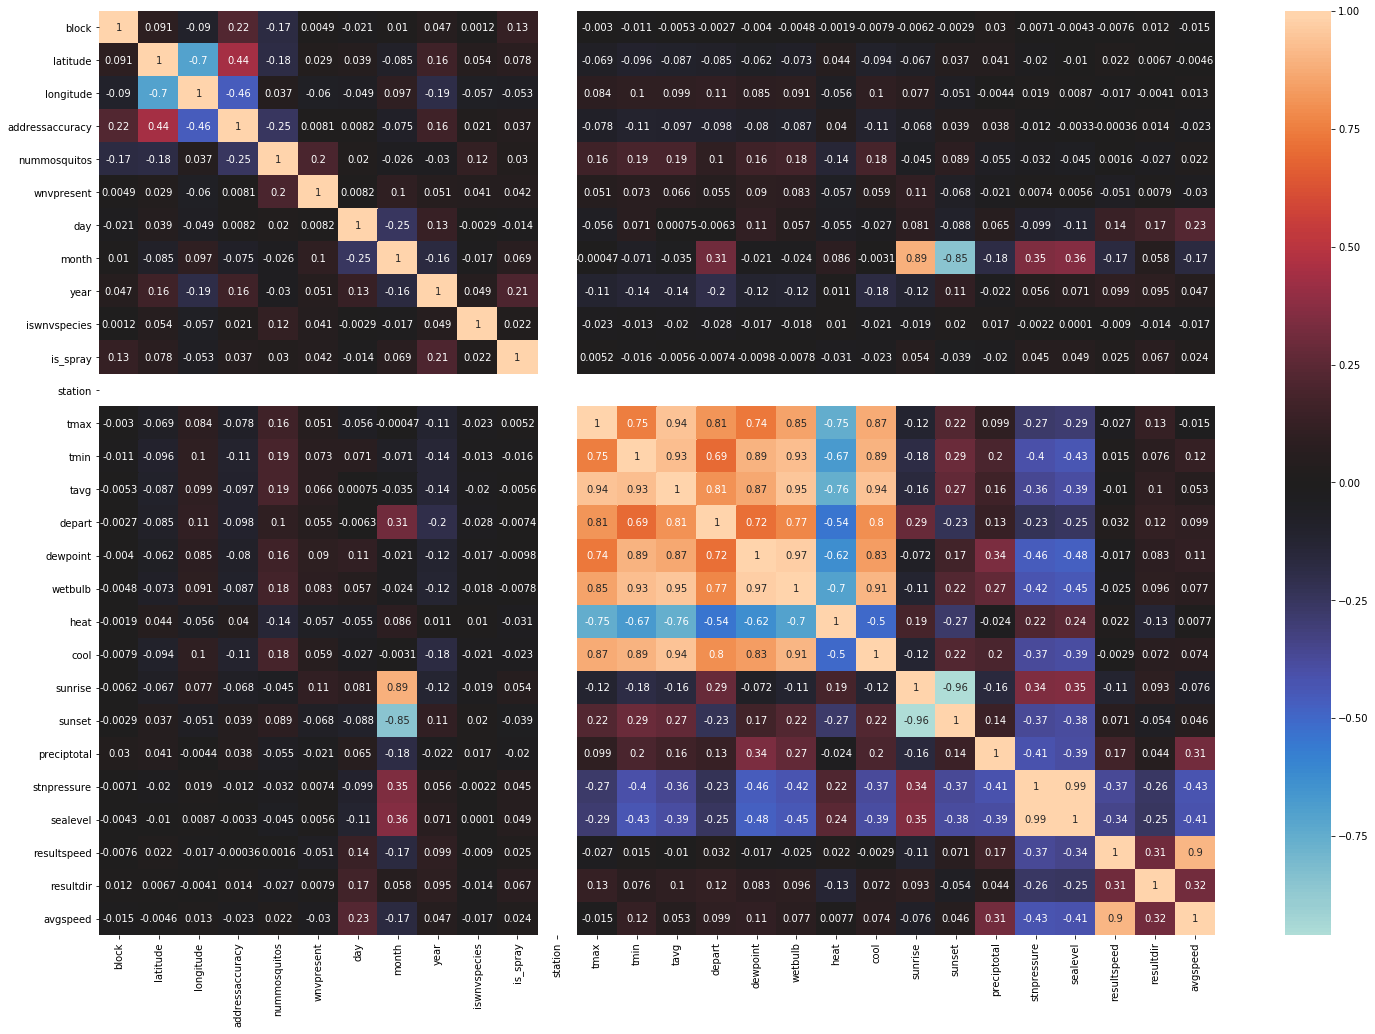

In [82]:
plt.figure(figsize=(25,17))
sns.heatmap(main_df.corr(),annot=True,center=0);

**Comment**

We can see that there are not any features which correlate with the target variable (wnvpresent). It can be due to categorical type of target variable and further research is required. 

It is also noticeable that many of weather features intercorrelate.

In [85]:
# Creating a function for boxplots
def subplot_boxplot(dataframe, list_columns,maintitle,blocks,figsize=(10,10)):
    """
    Plots a boxplot of the column which in the list. 
    
    Takes:
    dataframe
    list_columns - (list of str) - list of column's names.
    maintitle - (str) - main title for all scatterplots
    figsize - the custom size of a figure, 10x10 by default.
    blocks - (list of int) - list of block names
    
    Returns:
    Boxplot plot.
    """
    for i_blk in range(2):
        if i_blk < 2:
            block_df = dataframe[dataframe['block']==blocks[i_blk]]
            maintitle = maintitle + f' , block {blocks[i_blk]}'
        else:
            block_df = main_df.loc[main_df['block']!=blocks[0],:]
            block_df = block_df.loc[block_df['block']!=blocks[1],:]
            maintitle = maintitle + f' , other blocks.'
        nrows = int(np.ceil(len(list_columns)/3))
        fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=figsize)
        ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
        for i, column in enumerate(list_columns):
            block_df.boxplot(column=column, 
                        by='wnvpresent', ax=ax[i])
            ax[i].set_title(f'Boxplot of {column}\n', fontsize=20)
        #deleting empty subplot if list_of_list_columns is odd
    #     if len(list_columns)%2 !=0:
    #         fig.delaxes(ax[len(list_columns)-1]) 
        plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
        plt.suptitle(maintitle,fontsize=25)
        fig.subplots_adjust(top=0.95)
        plt.show()

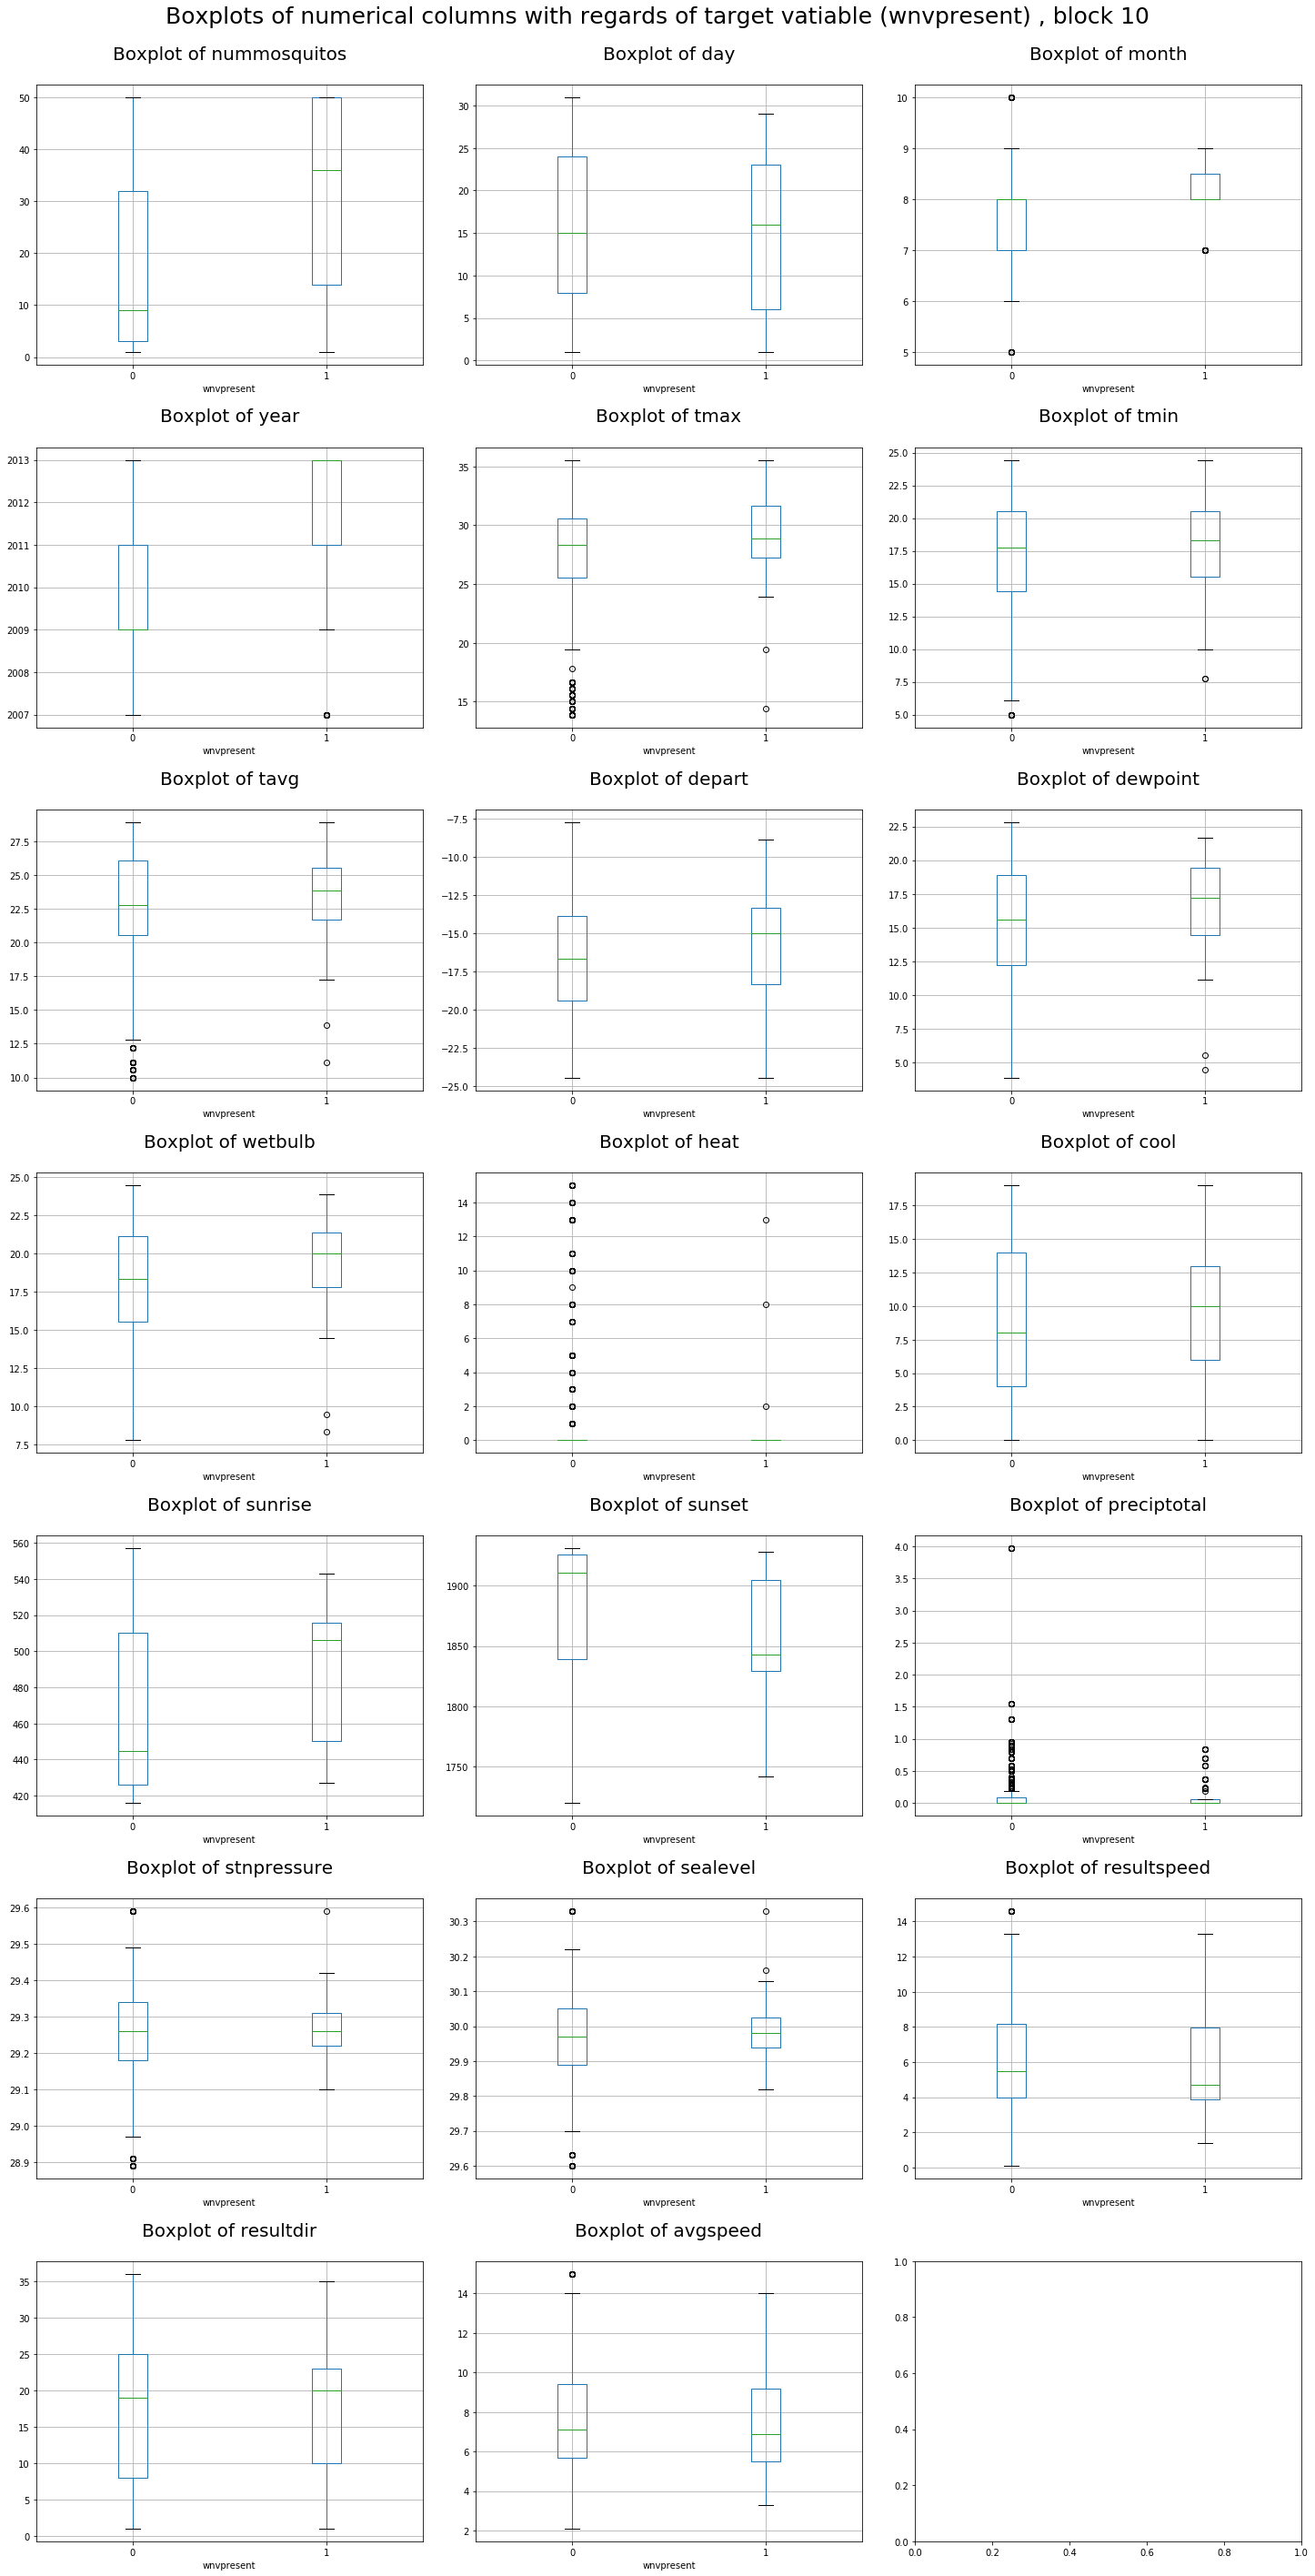

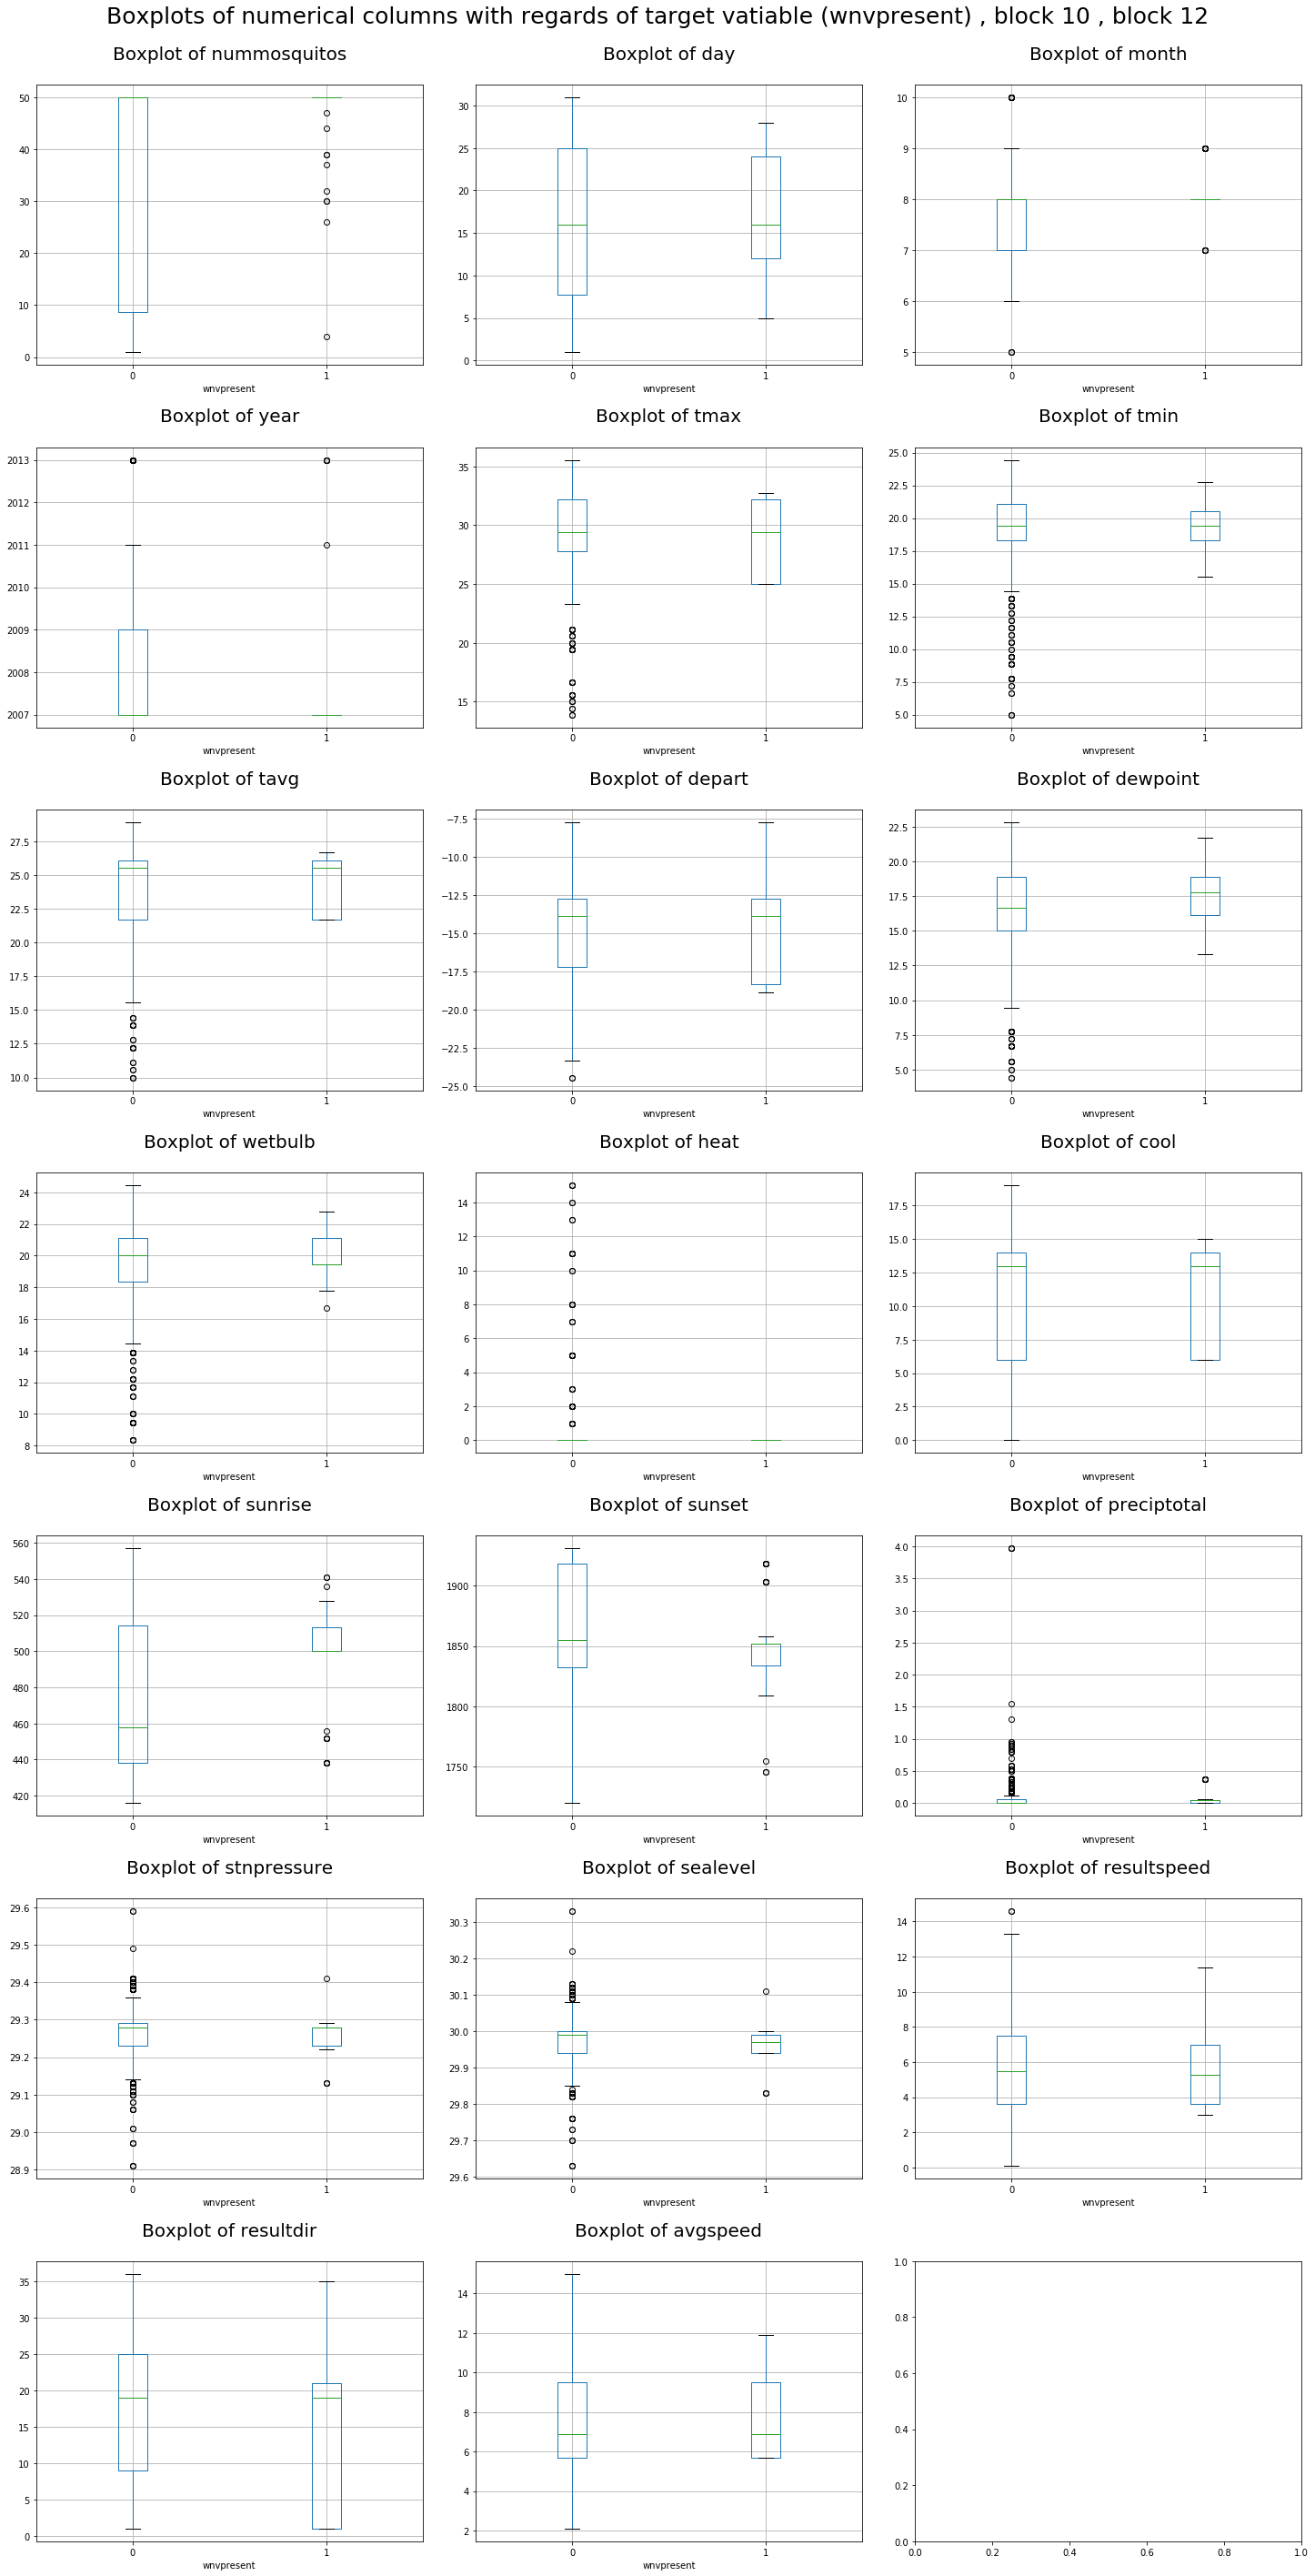

In [86]:
# boxplots by virus column
# looking for different distribution of features by virus present
# Due to imbalanced data, 10 and 12 blocks with the highest number of detected virus were separated
col = ['nummosquitos',
       'day', 'month', 'year', 'tmax',
       'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed']
maintitle = 'Boxplots of numerical columns with regards of target vatiable (wnvpresent)'
subplot_boxplot(main_df, col,maintitle,blocks=[10,12],figsize=(20,40))

In [87]:
# separating rows with detected and undetected virus
false_virus_df = main_df[main_df['wnvpresent']==0]
true_virus_df = main_df[main_df['wnvpresent']==1]

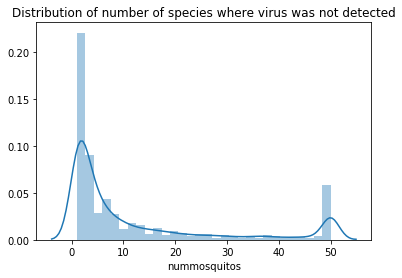

In [88]:
# looking for distribution of number of species where virus was not detected
sns.distplot(false_virus_df['nummosquitos'],bins=30)
plt.title('Distribution of number of species where virus was not detected');

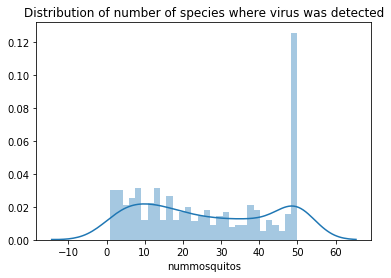

In [90]:
# looking for distribution of number of species where virus was detected
sns.distplot(true_virus_df['nummosquitos'],bins=30)
plt.title('Distribution of number of species where virus was detected');

In [91]:
false_virus_df.describe().T

,count,mean,std,min,25%,50%,75%,max
block,9955.0,35.659869,24.326517,10.000000,12.000000,33.000000,52.000000,98.000000
latitude,9955.0,41.840378,0.112269,41.644612,41.732984,41.846075,41.951866,42.017430
longitude,9955.0,-87.698538,0.095880,-87.930995,-87.757639,-87.694259,-87.627796,-87.531635
addressaccuracy,9955.0,7.816775,1.455860,3.000000,8.000000,8.000000,9.000000,9.000000
nummosquitos,9955.0,12.106479,15.745767,1.000000,2.000000,4.000000,15.000000,50.000000
wnvpresent,9955.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
day,9955.0,15.324159,8.922370,1.000000,7.000000,15.000000,24.000000,31.000000
month,9955.0,7.667403,1.083410,5.000000,7.000000,8.000000,8.000000,10.000000
year,9955.0,2009.548066,2.323664,2007.000000,2007.000000,2009.000000,2011.000000,2013.000000
iswnvspecies,9955.0,0.968358,0.175055,0.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
true_virus_df.describe().T

,count,mean,std,min,25%,50%,75%,max
block,551.0,36.192377,24.589118,10.000000,12.000000,36.000000,58.000000,93.000000
latitude,551.0,41.854891,0.120243,41.644612,41.731922,41.903002,41.973967,42.011601
longitude,551.0,-87.724663,0.104362,-87.930995,-87.800991,-87.725057,-87.642984,-87.531635
addressaccuracy,551.0,7.869328,1.399085,3.000000,8.000000,8.000000,9.000000,9.000000
nummosquitos,551.0,26.350272,17.089997,1.000000,11.000000,24.000000,44.000000,50.000000
wnvpresent,551.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
day,551.0,15.653358,8.511467,1.000000,8.000000,15.000000,22.000000,31.000000
month,551.0,8.147005,0.557743,6.000000,8.000000,8.000000,8.000000,10.000000
year,551.0,2010.085299,2.811338,2007.000000,2007.000000,2011.000000,2013.000000,2013.000000
iswnvspecies,551.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### ================================

Dealing with imbalanced data

In [221]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (GradientBoostingClassifier, AdaBoostClassifier, 
VotingClassifier, BaggingClassifier,RandomForestClassifier, ExtraTreesClassifier)

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score

import re
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


In [228]:
# Making a copy of main_df
main_df_ana = main_df.copy(deep=True)

In [229]:
# T094B T054C
# Changing trap name to number
# Function for removing letters and converting to int
def str_to_int(x):
    x = re.sub("[a-zA-Z]", "", x)
    return int(x)
main_df_ana['trap'] = main_df_ana['trap'].map(lambda x: str_to_int(x))
main_df_test['trap'] = main_df_test['trap'].map(lambda x: str_to_int(x))

In [230]:
# Baseline model
main_df_ana['wnvpresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: wnvpresent, dtype: float64

In [232]:
X_all = main_df_ana[['block', 'trap',
       'nummosquitos', 'day', 'month', 'year', 'iswnvspecies',
       'is_spray', 'station', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'depth',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed','wnvpresent']]
X = main_df_ana[['block', 'trap',
       'nummosquitos', 'day', 'month', 'year', 'iswnvspecies',
       'is_spray', 'station', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'depth',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed']]
y = main_df_ana['wnvpresent']
X_test_submit = main_df_test[['block', 'trap',
       'nummosquitos', 'day', 'month', 'year', 'iswnvspecies',
       'is_spray', 'station', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'depth',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed']]

#### Resampling with different methods

In [234]:
# defining minor and major classes
true_virus = X_all[X_all['wnvpresent']==1]
false_virus = X_all[X_all['wnvpresent']==0]

In [235]:
# doing undersampling of the majority class
on=False
if on:
    false_virus_downsampled = resample(false_virus,
                                    replace = False, # sample without replacement
                                    n_samples = len(true_virus), # match minority n
                                    random_state = 42) # reproducible results

    # combine minority and downsampled majority
    downsampled = pd.concat([false_virus_downsampled, true_virus])
    X_unders = downsampled[['block', 'trap',
           'nummosquitos', 'day', 'month', 'year', 'iswnvspecies',
           'is_spray', 'station', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
           'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'depth',
           'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
           'resultdir', 'avgspeed']]
    y_unders = downsampled['wnvpresent']
    # checking counts
    downsampled.wnvpresent.value_counts()

1    551
0    551
Name: wnvpresent, dtype: int64

In [236]:
# Doing oversempling the minority class
# https://www.kaggle.com/tboyle10/methods-for-dealing-with-imbalanced-data
# Separate input features and target

on=False
if on:
    sm = SMOTE(sampling_strategy='minority',random_state=42)
    X_train_sm, y_train_sm = sm.fit_sample(X, y)
    oversempling_smote = pd.concat([X_train_sm, y_train_sm],axis=1)
    oversempling_smote.wnvpresent.value_counts()


1    7466
0    7466
Name: wnvpresent, dtype: int64

In [237]:
# a combination of over-sampling and under-sampling
# https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
on=False
if on:
    smt = SMOTETomek(sampling_strategy='auto')
    X_smt, y_smt = smt.fit_sample(X, y)
    oversempling_smoteTomek = pd.concat([X_smt, y_smt],axis=1)
    oversempling_smoteTomek.wnvpresent.value_counts()

1    7420
0    7420
Name: wnvpresent, dtype: int64

In [238]:
# Creating function for resamling
def resampling_dataset(how,X_train,y_train,on=True):
    """
    Resamples imbalanced dataset
    
    Takes:
    how (str) : 'under', 'over', 'smote'
    x - df - with features
    y - series - with target
    on - on/of function
    Returns:
    X,y
    """
    if on:
        if how == 'under':
            X = pd.concat([X_train, y_train])
            true_virus = X[X['wnvpresent']==1]
            false_virus = X[X['wnvpresent']==0]
            false_virus_downsampled = resample(false_virus,
                                    replace = False, # sample without replacement
                                    n_samples = len(true_virus), # match minority n
                                    random_state = 42) # reproducible results

            # combine minority and downsampled majority
            downsampled = pd.concat([false_virus_downsampled, true_virus])
            X_unders = downsampled[['block', 'trap',
                   'nummosquitos', 'day', 'month', 'year', 'iswnvspecies',
                   'is_spray', 'station', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
                   'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'depth',
                   'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
                   'resultdir', 'avgspeed']]
            y_unders = downsampled['wnvpresent']
            return X_unders, y_unders
        elif how == 'over':
            sm = SMOTE(sampling_strategy='minority',random_state=42)
            X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
            oversempling_smote = pd.concat([X_train_sm, y_train_sm],axis=1)
            return X_train_sm, y_train_sm
        else:
            smt = SMOTETomek(sampling_strategy='auto')
            X_smt, y_smt = smt.fit_sample(X_train, y_train)
            return X_smt, y_smt

Checking perfomance logistic regression on the 3 new datasets

In [275]:
# Creating function for simple models evaluation
def sample_evaluation(X,y,models,names_samples,on=True):
    if on:
        for i in range(len(X)):
            X_train, X_test, y_train, y_test = train_test_split(X[i],y[i])
            ss = StandardScaler()
            X_train_scaled = ss.fit_transform(X_train)
            X_test_scaled = ss.transform(X_test)
            for model in models:
                cv_scores = cross_val_score(model,X_train_scaled,y_train)
                model.fit(X_train_scaled,y_train)
                train_score = model.score(X_train_scaled,y_train)
                test_score = model.score(X_test_scaled,y_test)
                print(names_samples[i])
                print(str(model).split('(')[0])
                print('CV',cv_scores)
                print('train',train_score)
                print('test',test_score)
                # set of predicted labels match the corresponding set of true labels
                y_predicted = model.predict(X_test_scaled)
                accuracy = accuracy_score(y_test, y_predicted)
                # ratio tp / (tp + fp)
                precision = precision_score(y_test, y_predicted)             
                # ratio tp / (tp + fn)
                recall = recall_score(y_test, y_predicted)
                # weighted average of the precision and recall
                # F1 = 2 * (precision * recall) / (precision + recall)
                f1 = f1_score(y_test, y_predicted)
                tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
                print("True Negatives: %s" % tn)
                print("False Positives: %s" % fp)
                print("False Negatives: %s" % fn)
                print("True Positives: %s" % tp)
                print(f'accuracy {round(accuracy,3)}, precision {round(precision,3)},recall {round(recall,3)}, f1 {round(f1,3)}')
                print('==================')

In [276]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dtree = DecisionTreeClassifier()
randtree = RandomForestClassifier()

In [294]:
sample_evaluation([X_unders, X_train_sm, X_smt],[y_unders, y_train_sm,y_smt],
                  models=[lr,knn,svm,dtree,randtree,],
                  names_samples=['undersampling','oversampling','smote'],
                 on=False)

C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

oversampling
LogisticRegression
CV [0.77803817 0.78707734 0.79772271 0.7722706  0.79035499]
train 0.7866327350656308
test 0.7764162314182402
True Negatives: 1881
False Positives: 649
False Negatives: 464
True Positives: 1984
accuracy 0.776, precision 0.754,recall 0.81, f1 0.781
oversampling
KNeighborsClassifier
CV [0.91161701 0.91027787 0.92665774 0.90991293 0.92163429]
train 0.9454192338601661
test 0.9274809160305344
True Negatives: 2261
False Positives: 269
False Negatives: 92
True Positives: 2356
accuracy 0.927, precision 0.898,recall 0.962, f1 0.929
oversampling
SVC
CV [0.84767325 0.86240375 0.87006028 0.85867381 0.86436705]
train 0.8698767747120278
test 0.8674166331860185
True Negatives: 2058
False Positives: 472
False Negatives: 188
True Positives: 2260
accuracy 0.867, precision 0.827,recall 0.923, f1 0.873
oversampling
DecisionTreeClassifier
CV [0.92366923 0.92500837 0.94206296 0.91594106 0.92799732]
train 0.9839271363514599
test 0.9286862193652069
True Negatives: 2309
False Pos

In [278]:
# Creating function for models evaluation with gridsearch parameters
def sample_evaluation_grid(X,y,models,params,names_samples,on=True):
    """
    Use different resample and different ML models to evaluate perfomance with gridsearch
    Takes:
    X - list of resampled X
    y - list of resampled y
    params - list of hyperparameters for gridsearch
    name_samples - list of str - name of resampling technique
    
    Prints accoracy score on train and test data
    """
    if on:
        for i in range(len(X)):
            X_train, X_test, y_train, y_test = train_test_split(X[i],y[i])
            ss = StandardScaler()
            X_train_scaled = ss.fit_transform(X_train)
            X_test_scaled = ss.transform(X_test)
            for j, model in enumerate(models):
                grid = GridSearchCV(model,param_grid=params[j])
                cv_scores = cross_val_score(grid,X_train_scaled,y_train)
                grid.fit(X_train,y_train)
                best_model = grid.best_estimator_
                best_model.fit(X_train_scaled,y_train)
                train_score = best_model.score(X_train_scaled,y_train)
                test_score = best_model.score(X_test_scaled,y_test)
                print(names_samples[i])
                print(str(model).split('(')[0])
                print(grid.best_params_)
                print('CV',cv_scores)
                print('train',train_score)
                print('test',test_score)
                print('==================')
                # set of predicted labels match the corresponding set of true labels
                y_predicted = best_model.predict(X_test_scaled)
                accuracy = accuracy_score(y_test, y_predicted)
                # ratio tp / (tp + fp)
                precision = precision_score(y_test, y_predicted)             
                # ratio tp / (tp + fn)
                recall = recall_score(y_test, y_predicted)
                # weighted average of the precision and recall
                # F1 = 2 * (precision * recall) / (precision + recall)
                f1 = f1_score(y_test, y_predicted)
                tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
                print("True Negatives: %s" % tn)
                print("False Positives: %s" % fp)
                print("False Negatives: %s" % fn)
                print("True Positives: %s" % tp)
                print(f'accuracy {round(accuracy,3)}, precision {round(precision,3)},recall {round(recall,3)}, f1 {round(f1,3)}')
                print('==================')

In [283]:
# Using function for models evaluation with gridsearch
X,y = resampling_dataset('over',X,y,on=False)

lr = LogisticRegression()
knn = KNeighborsClassifier(n_jobs=-1)
svm = SVC()
dtree = DecisionTreeClassifier()
randtree = RandomForestClassifier()
# bagg = BaggingClassifier()
# gradb = GradientBoostingClassifier()
# ada = AdaBoostClassifier()
# vote = VotingClassifier()

sample_evaluation_grid([X],[y],
models=[lr,knn,svm,dtree,randtree,],names_samples=['undersampling','oversampling','smote'],
params = [{'penalty':['l2','none'],'tol':[0.0001,0.001],'max_iter':[500,700]},
         {'n_neighbors':[3,5,7], 'weights':['uniform','distance']},
         {'degree':[1,3,6]},
        {'max_depth':[None,10,15],'min_samples_leaf':[2,5,8]},
        {'n_estimators':[80,100,150],'max_depth':[None,10,15],'min_samples_leaf':[2,5,8]}],
                       on=False)

C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\anpej\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

undersampling
LogisticRegression
{'max_iter': 500, 'penalty': 'l2', 'tol': 0.0001}
CV [0.78808169 0.78975561 0.77796383 0.77829873 0.77997321]
train 0.7840208947227431
test 0.7852551225391724
True Negatives: 1828
False Positives: 638
False Negatives: 431
True Positives: 2081
accuracy 0.785, precision 0.765,recall 0.828, f1 0.796
undersampling
KNeighborsClassifier
{'n_neighbors': 3, 'weights': 'distance'}
CV [0.92735186 0.92902578 0.92531815 0.93335566 0.93369056]
train 0.9819180283953924
test 0.9343109682603455
True Negatives: 2263
False Positives: 203
False Negatives: 124
True Positives: 2388
accuracy 0.934, precision 0.922,recall 0.951, f1 0.936
undersampling
SVC
{'degree': 1}
CV [0.87244727 0.8570472  0.85599464 0.86771601 0.85365037]
train 0.8692740423252077
test 0.8710325431900362
True Negatives: 2024
False Positives: 442
False Negatives: 200
True Positives: 2312
accuracy 0.871, precision 0.84,recall 0.92, f1 0.878
undersampling
DecisionTreeClassifier
{'max_depth': None, 'min_samp

        undersampling
        LogisticRegression
        {'max_iter': 500, 'penalty': 'l2', 'tol': 0.0001}
        CV [0.78808169 0.78975561 0.77796383 0.77829873 0.77997321]
        train 0.7840208947227431
        test 0.7852551225391724
        ==================
        True Negatives: 1828
        False Positives: 638
        False Negatives: 431
        True Positives: 2081
        accuracy 0.785, precision 0.765,recall 0.828, f1 0.796
        ==================
        undersampling
        KNeighborsClassifier
        {'n_neighbors': 3, 'weights': 'distance'}
        CV [0.92735186 0.92902578 0.92531815 0.93335566 0.93369056]
        train 0.9819180283953924
        test 0.9343109682603455
        ==================
        True Negatives: 2263
        False Positives: 203
        False Negatives: 124
        True Positives: 2388
        accuracy 0.934, precision 0.922,recall 0.951, f1 0.936
        ==================
        undersampling
        SVC
        {'degree': 1}
        CV [0.87244727 0.8570472  0.85599464 0.86771601 0.85365037]
        train 0.8692740423252077
        test 0.8710325431900362
        ==================
        True Negatives: 2024
        False Positives: 442
        False Negatives: 200
        True Positives: 2312
        accuracy 0.871, precision 0.84,recall 0.92, f1 0.878
        ==================
        undersampling
        DecisionTreeClassifier
        {'max_depth': None, 'min_samples_leaf': 2}
        CV [0.92166053 0.90693003 0.90756865 0.91761554 0.91594106]
        train 0.9693945888025717
        test 0.9296906388107674
        ==================
        True Negatives: 2285
        False Positives: 181
        False Negatives: 169
        True Positives: 2343
        accuracy 0.93, precision 0.928,recall 0.933, f1 0.931
        ==================
        undersampling
        RandomForestClassifier
        {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
        CV [0.94174757 0.93304319 0.93436035 0.94306765 0.93503014]
        train 0.9699303509241897
        test 0.9453595821615106
        ==================
        True Negatives: 2297
        False Positives: 169
        False Negatives: 103
        True Positives: 2409
        accuracy 0.945, precision 0.934,recall 0.959, f1 0.947
        ==================

In [295]:
# Evaluation of ensambles of models

# bag = BaggingClassifier()
# gradb = GradientBoostingClassifier()
# ada = AdaBoostClassifier()

# sample_evaluation_grid([X],[y],
# models=[bag,gradb,ada],names_samples=['oversampling'],
# params = [{'base_estimator':[LogisticRegression(),
#                              SVC(),
#                              KNeighborsClassifier(n_jobs=-1),
#                              DecisionTreeClassifier()]},
#          {'base_estimator':[LogisticRegression(),
#                              SVC(),
#                              KNeighborsClassifier(n_jobs=-1),
#                              DecisionTreeClassifier()]},
#          {'base_estimator':[LogisticRegression(),
#                              SVC(),
#                              KNeighborsClassifier(n_jobs=-1),
#                              DecisionTreeClassifier()]}])

In [310]:
# Creation a voting classifier with best models
vc = VotingClassifier(estimators=[('knn',KNeighborsClassifier()),
                                ('tree',DecisionTreeClassifier()),
                                 ('randomtree',RandomForestClassifier()),
                                ('gradboost',GradientBoostingClassifier()),
                                 ('lr',LogisticRegression())])


In [ ]:
# Using gridsearch for better evaluation
on=False
if on:
    vc_params = {
        'knn__weights':['uniform','distance'],
        'knn__n_neighbors':[3,5,7,10],
        'tree__max_depth':[None,2,4],
        'tree__min_samples_leaf':[1,2,3],
        'randomtree__max_depth':[None,2,4],
        'tree__min_samples_leaf':[1,2,3],
        'gradboost__max_depth':[4,5], 
        'gradboost__n_estimators':[100,125],
        'gradboost__learning_rate':[0.1,0.3,0.5],
        'lr__penalty':['l2', 'none'],
        'lr__max_iter':[500,1000],
        'voting':['soft','hard']}


    X_train, X_test, y_train, y_test = train_test_split(X,y)
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)

    gs_vc = GridSearchCV(vc,param_grid=vc_params)
    gs_vc.fit(X_train_scaled,y_train)
    vc.score(X_train_scaled,y_train)
    vc.score(X_test_scaled,y_test)

In [ ]:
best_classifier = gs_vc.best_params_
best_classifier.fit(X_train_scaled,y_train)
# set of predicted labels match the corresponding set of true labels
y_predicted = best_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predicted)
# ratio tp / (tp + fp)
precision = precision_score(y_test, y_predicted)             
# ratio tp / (tp + fn)
recall = recall_score(y_test, y_predicted)
# weighted average of the precision and recall
# F1 = 2 * (precision * recall) / (precision + recall)
f1 = f1_score(y_test, y_predicted)
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print(f'accuracy {round(accuracy,3)}, precision {round(precision,3)},recall {round(recall,3)}, f1 {round(f1,3)}')
print('==================')

In [ ]:
submit_df = pd.DataFrame()
submit_df['id'] = X_test_submit['id']
submit_df['wnvpresent'] = best_classifier.predict(X_test_submit)
submit_df.to_csv('submission.csv', index=False)

In [ ]:
# Will try leter regularization

In [ ]:
# cols = list(X.columns)
# pmax = 1
# while (len(cols)>0):
#     p= []
#     X_1 = X[cols]
#     X_1 = sm.add_constant(X_1)
#     model = sm.OLS(y,X_1).fit()
#     p = pd.Series(model.pvalues.values[1:],index = cols)      
#     pmax = max(p)
#     feature_with_p_max = p.idxmax()
#     if(pmax>0.05):
#         cols.remove(feature_with_p_max)
#     else:
#         break
# selected_features_BE = cols
# print('Final set of variables:',selected_features_BE)

In [ ]:
# from sklearn.feature_selection import RFE
# # № of features from 1 to original number of columns
# nof_list=np.arange(1,13)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# score_list =[]
# for n in range(len(nof_list)):
#     X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
#     model = LinearRegression()
#     rfe = RFE(model,nof_list[n])
#     X_train_rfe = rfe.fit_transform(X_train,y_train)
#     X_test_rfe = rfe.transform(X_test)
#     model.fit(X_train_rfe,y_train)
#     score = model.score(X_test_rfe,y_test)
#     score_list.append(score)
#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]
# print("Optimum number of features: %d" %nof)
# print("Score (R2) with %d features: %f" % (nof, high_score))

In [ ]:
# cols = list(X.columns)
# model = LinearRegression()
# # Initializing RFE model
# rfe = RFE(model, 12)             
# # Transforming data using RFE
# X_rfe = rfe.fit_transform(X,y)  
# # Fitting the data to model
# model.fit(X_rfe,y)              
# temp = pd.Series(rfe.support_,index = cols)
# selected_features_rfe = temp[temp==True].index
# print(selected_features_rfe)

In [ ]:
X_test_submit

In [ ]:
# Will try leter find a better features

In [ ]:
# # DBSCAN for deviding on clusters
# # Standartizing data
# ss = StandardScaler()
# X_scaled = ss.fit_transform(X)
# # Training DBSCAN for predicting 
# dbs = DBSCAN()
# dbs.fit(X)
# np.unique(dbs.labels_)

In [ ]:
# main_df_ana['new_labels'] = dbs.labels_

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

In [ ]:
# dt = DecisionTreeClassifier()
# dt.fit(X,y)
# dt.score(X,y)

In [ ]:
# from sklearn.tree import export_text

# # Print out tree in plaintext.
# print(export_text(dt,
#                   list(X.columns)))